In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import pointbiserialr

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv('churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
df.duplicated().sum()

0

In [5]:
for col in ['CaseOrder', 'Customer_id', 'Interaction', 'UID']:
    print(col, df[col].nunique())

CaseOrder 10000
Customer_id 10000
Interaction 10000
UID 10000


In [6]:
df['City'].nunique()

6058

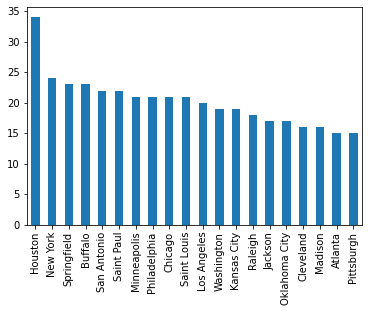

In [7]:
df['City'].value_counts()[:20].plot(kind='bar')
plt.show()

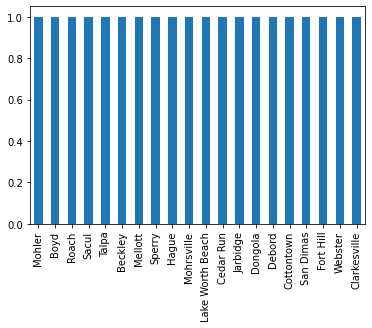

In [8]:
df['City'].value_counts()[-20:].plot(kind='bar')
plt.show()

In [9]:
df['State'].nunique()

52

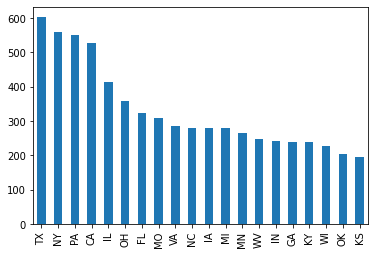

In [10]:
df['State'].value_counts()[:20].plot(kind='bar')
plt.show()

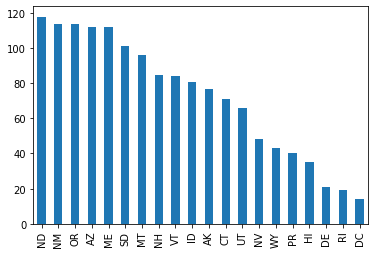

In [11]:
df['State'].value_counts()[-20:].plot(kind='bar')
plt.show()

In [12]:
df['County'].nunique()

1620

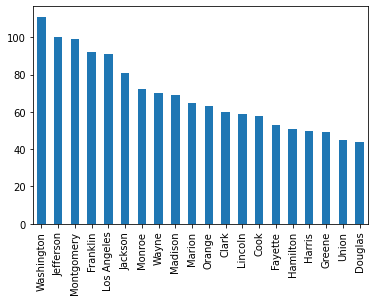

In [13]:
df['County'].value_counts()[:20].plot(kind='bar')
plt.show()

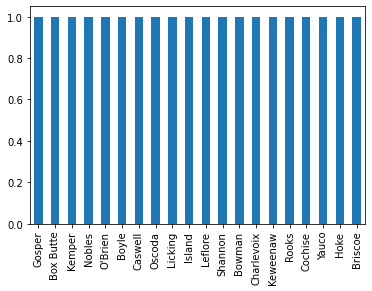

In [14]:
df['County'].value_counts()[-20:].plot(kind='bar')
plt.show()

In [15]:
df['Zip'].nunique()

8583

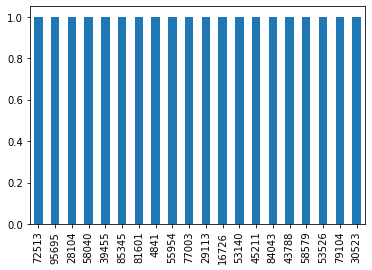

In [16]:
df['Zip'].value_counts()[-20:].plot(kind='bar')
plt.show()

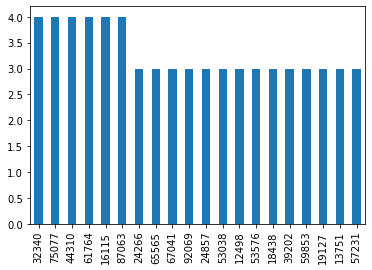

In [17]:
df['Zip'].value_counts()[:20].plot(kind='bar')
plt.show()

In [18]:
df['Lat'].describe()

count    10000.000000
mean        38.757567
std          5.437389
min         17.966120
25%         35.341828
50%         39.395800
75%         42.106908
max         70.640660
Name: Lat, dtype: float64

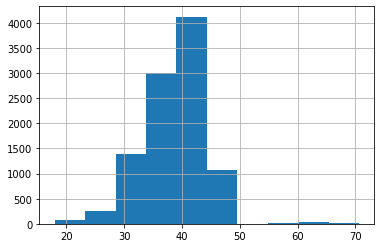

In [19]:
df['Lat'].hist()
plt.show()

In [20]:
df['Lng'].describe()

count    10000.000000
mean       -90.782536
std         15.156142
min       -171.688150
25%        -97.082812
50%        -87.918800
75%        -80.088745
max        -65.667850
Name: Lng, dtype: float64

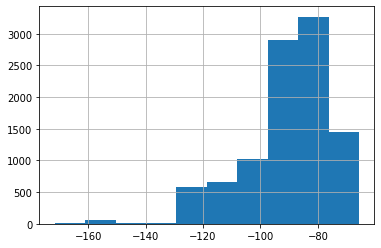

In [21]:
df['Lng'].hist()
plt.show()

In [22]:
df['Population'].describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

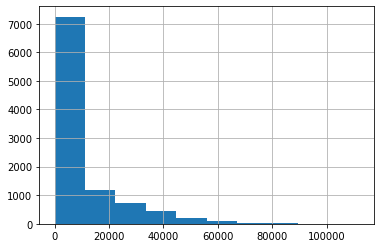

In [23]:
df['Population'].hist()
plt.show()

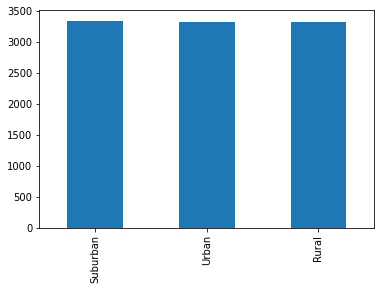

In [24]:
df['Area'].value_counts().plot(kind='bar')
plt.show()

In [25]:
df['Area'].value_counts()

Suburban    3346
Urban       3327
Rural       3327
Name: Area, dtype: int64

In [26]:
df['TimeZone'].nunique()

25

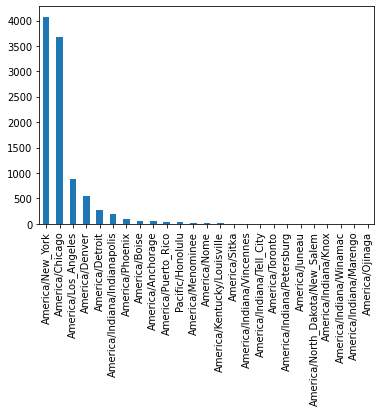

In [27]:
df['TimeZone'].value_counts().plot(kind='bar')
plt.show()

In [28]:
df['TimeZone'].value_counts()

America/New_York                  4072
America/Chicago                   3672
America/Los_Angeles                887
America/Denver                     552
America/Detroit                    265
America/Indiana/Indianapolis       186
America/Phoenix                    104
America/Boise                       57
America/Anchorage                   55
America/Puerto_Rico                 40
Pacific/Honolulu                    35
America/Menominee                   16
America/Nome                        12
America/Kentucky/Louisville         10
America/Sitka                        8
America/Indiana/Vincennes            6
America/Indiana/Tell_City            6
America/Toronto                      5
America/Indiana/Petersburg           4
America/Juneau                       2
America/North_Dakota/New_Salem       2
America/Indiana/Knox                 1
America/Indiana/Winamac              1
America/Indiana/Marengo              1
America/Ojinaga                      1
Name: TimeZone, dtype: in

In [29]:
df['Job'].nunique()

639

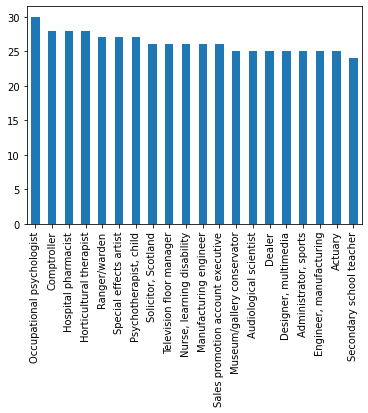

In [30]:
df['Job'].value_counts()[:20].plot(kind='bar')
plt.show()

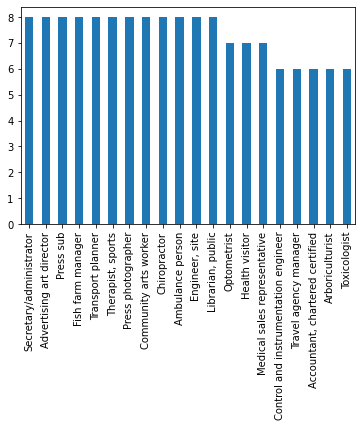

In [31]:
df['Job'].value_counts()[-20:].plot(kind='bar')
plt.show()

In [32]:
df['Children'].describe()

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

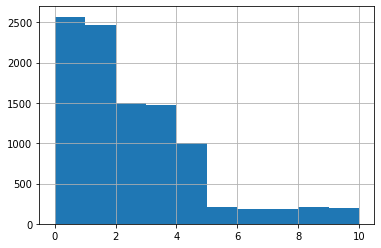

In [33]:
df['Children'].hist()
plt.show()

In [34]:
df['Age'].describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

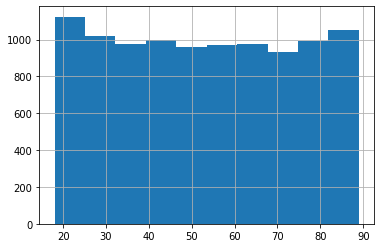

In [35]:
df['Age'].hist()
plt.show()

In [36]:
df['Income'].describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

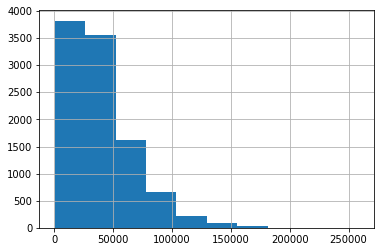

In [37]:
df['Income'].hist()
plt.show()

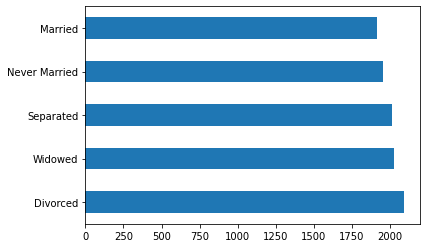

In [38]:
df['Marital'].value_counts().plot(kind='barh')
plt.show()

In [39]:
df['Marital'].value_counts()

Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64

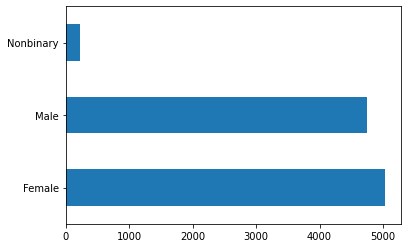

In [40]:
df['Gender'].value_counts().plot(kind='barh')
plt.show()

In [41]:
df['Gender'].value_counts()

Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64

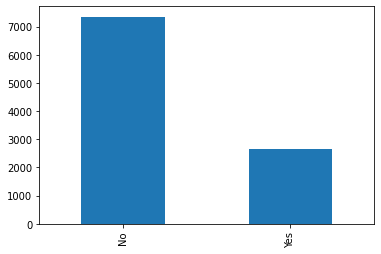

In [42]:
df['Churn'].value_counts().plot(kind='bar')
plt.show()

In [43]:
df['Churn'].value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

In [44]:
df['Outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

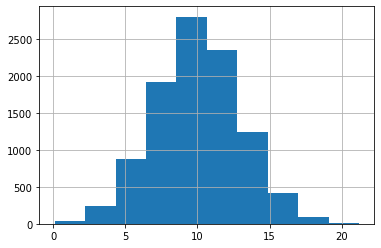

In [45]:
df['Outage_sec_perweek'].hist()
plt.show()

In [46]:
df['Email'].describe()

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Email, dtype: float64

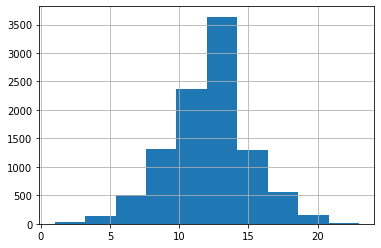

In [47]:
df['Email'].hist()
plt.show()

In [48]:
df['Contacts'].describe()

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64

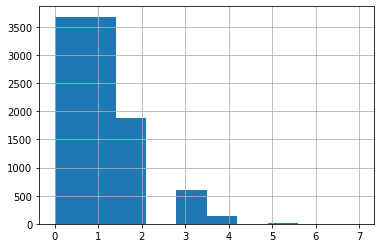

In [49]:
df['Contacts'].hist()
plt.show()

In [50]:
df['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

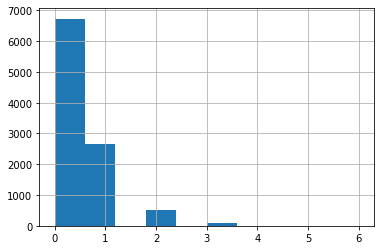

In [51]:
df['Yearly_equip_failure'].hist()
plt.show()

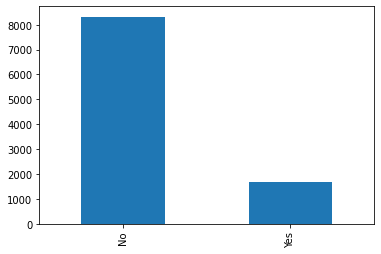

In [52]:
df['Techie'].value_counts().plot(kind='bar')
plt.show()

In [53]:
df['Techie'].value_counts()

No     8321
Yes    1679
Name: Techie, dtype: int64

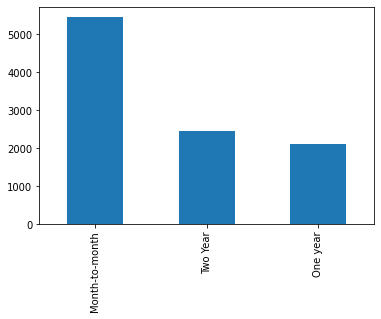

In [54]:
df['Contract'].value_counts().plot(kind='bar')
plt.show()

In [55]:
df['Contract'].value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

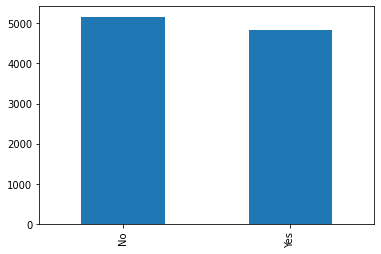

In [56]:
df['Port_modem'].value_counts().plot(kind='bar')
plt.show()

In [57]:
df['Port_modem'].value_counts()

No     5166
Yes    4834
Name: Port_modem, dtype: int64

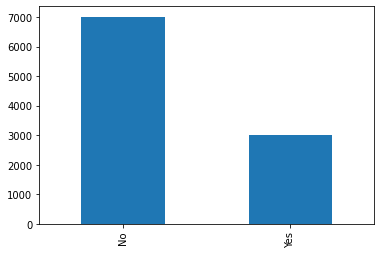

In [58]:
df['Tablet'].value_counts().plot(kind='bar')
plt.show()

In [59]:
df['Tablet'].value_counts()

No     7009
Yes    2991
Name: Tablet, dtype: int64

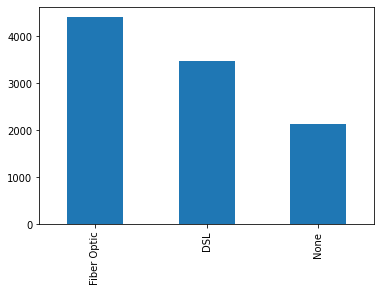

In [60]:
df['InternetService'].value_counts().plot(kind='bar')
plt.show()

In [61]:
df['InternetService'].value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

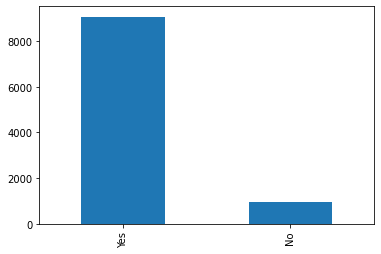

In [62]:
df['Phone'].value_counts().plot(kind='bar')
plt.show()

In [63]:
df['Phone'].value_counts()

Yes    9067
No      933
Name: Phone, dtype: int64

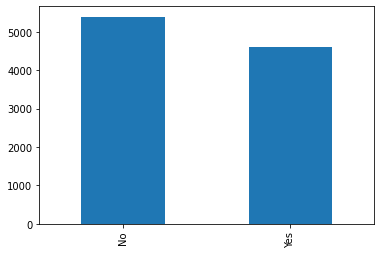

In [64]:
df['Multiple'].value_counts().plot(kind='bar')
plt.show()

In [65]:
df['Multiple'].value_counts()

No     5392
Yes    4608
Name: Multiple, dtype: int64

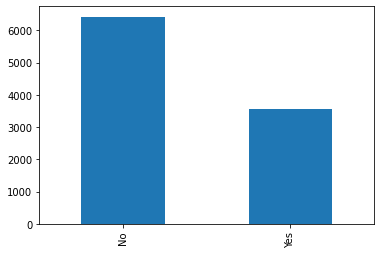

In [66]:
df['OnlineSecurity'].value_counts().plot(kind='bar')
plt.show()

In [67]:
df['OnlineSecurity'].value_counts()

No     6424
Yes    3576
Name: OnlineSecurity, dtype: int64

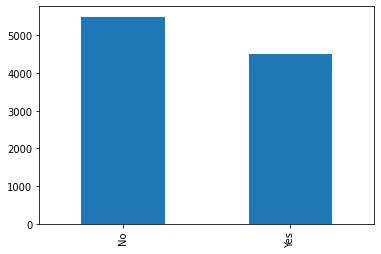

In [68]:
df['OnlineBackup'].value_counts().plot(kind='bar')
plt.show()

In [69]:
df['OnlineBackup'].value_counts()

No     5494
Yes    4506
Name: OnlineBackup, dtype: int64

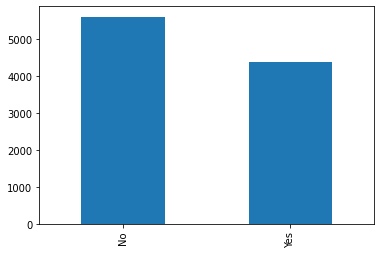

In [70]:
df['DeviceProtection'].value_counts().plot(kind='bar')
plt.show()

In [71]:
df['DeviceProtection'].value_counts()

No     5614
Yes    4386
Name: DeviceProtection, dtype: int64

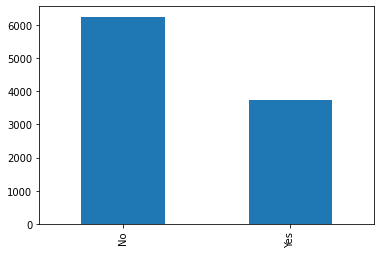

In [72]:
df['TechSupport'].value_counts().plot(kind='bar')
plt.show()

In [73]:
df['TechSupport'].value_counts()

No     6250
Yes    3750
Name: TechSupport, dtype: int64

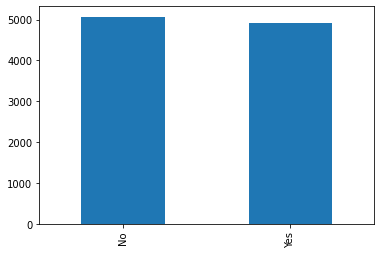

In [74]:
df['StreamingTV'].value_counts().plot(kind='bar')
plt.show()

In [75]:
df['StreamingTV'].value_counts()

No     5071
Yes    4929
Name: StreamingTV, dtype: int64

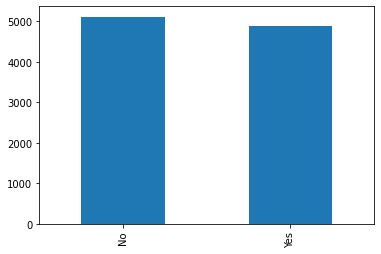

In [76]:
df['StreamingMovies'].value_counts().plot(kind='bar')
plt.show()

In [77]:
df['StreamingMovies'].value_counts()

No     5110
Yes    4890
Name: StreamingMovies, dtype: int64

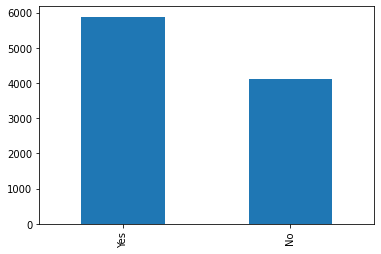

In [78]:
df['PaperlessBilling'].value_counts().plot(kind='bar')
plt.show()

In [79]:
df['PaperlessBilling'].value_counts()

Yes    5882
No     4118
Name: PaperlessBilling, dtype: int64

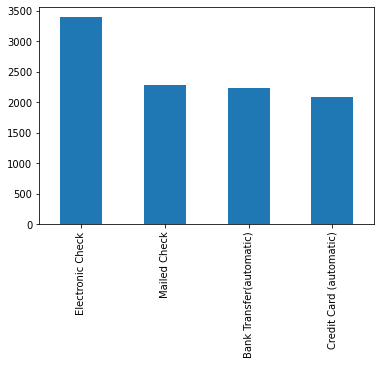

In [80]:
df['PaymentMethod'].value_counts().plot(kind='bar')
plt.show()

In [81]:
df['PaymentMethod'].value_counts()

Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: PaymentMethod, dtype: int64

In [82]:
df['Tenure'].describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

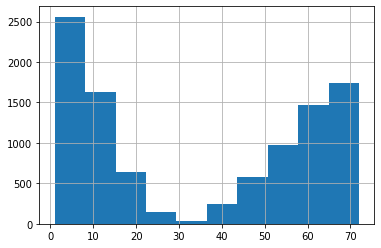

In [83]:
df['Tenure'].hist()
plt.show()

In [84]:
df['MonthlyCharge'].describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

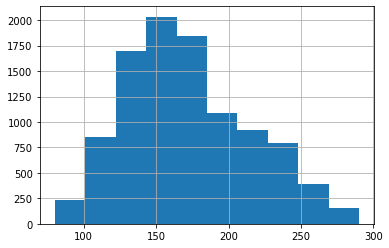

In [85]:
df['MonthlyCharge'].hist()
plt.show()

In [86]:
df['Bandwidth_GB_Year'].describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

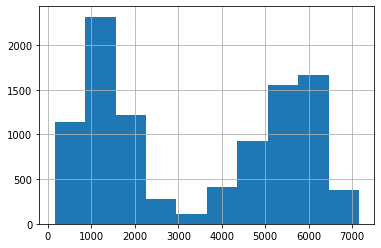

In [87]:
df['Bandwidth_GB_Year'].hist()
plt.show()

In [88]:
df['Item1'].describe()

count    10000.000000
mean         3.490800
std          1.037797
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item1, dtype: float64

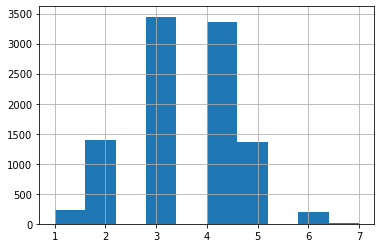

In [89]:
df['Item1'].hist()
plt.show()

In [90]:
df['Item2'].describe()

count    10000.000000
mean         3.505100
std          1.034641
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: Item2, dtype: float64

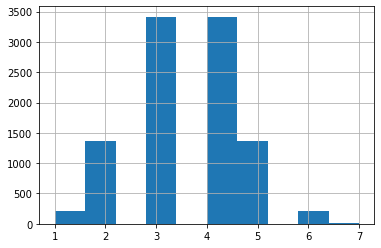

In [91]:
df['Item2'].hist()
plt.show()

In [92]:
df['Item3'].describe()

count    10000.000000
mean         3.487000
std          1.027977
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: Item3, dtype: float64

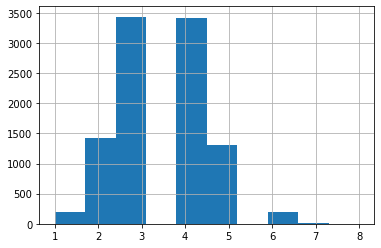

In [93]:
df['Item3'].hist()
plt.show()

In [94]:
df['Item4'].describe()

count    10000.000000
mean         3.497500
std          1.025816
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item4, dtype: float64

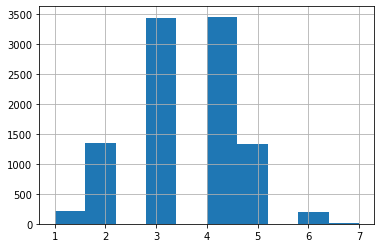

In [95]:
df['Item4'].hist()
plt.show()

In [96]:
df['Item5'].describe()

count    10000.000000
mean         3.492900
std          1.024819
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Item5, dtype: float64

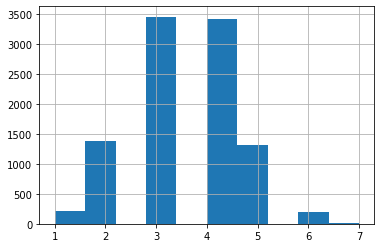

In [97]:
df['Item5'].hist()
plt.show()

In [98]:
df['Item6'].describe()

count    10000.000000
mean         3.497300
std          1.033586
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: Item6, dtype: float64

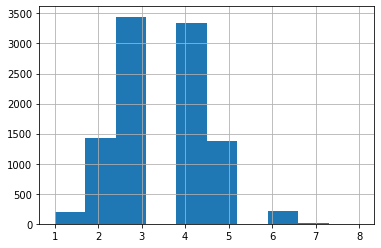

In [99]:
df['Item6'].hist()
plt.show()

In [100]:
df['Item7'].describe()

count    10000.000000
mean         3.509500
std          1.028502
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: Item7, dtype: float64

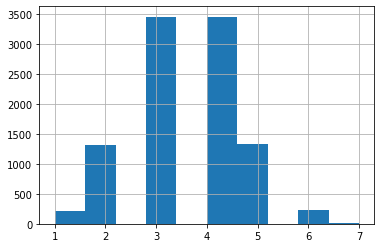

In [101]:
df['Item7'].hist()
plt.show()

In [102]:
df['Item8'].describe()

count    10000.000000
mean         3.495600
std          1.028633
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: Item8, dtype: float64

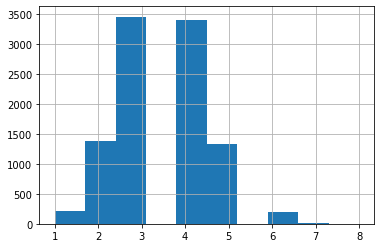

In [103]:
df['Item8'].hist()
plt.show()

In [104]:
data = df.copy()
data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [105]:
data['Population_Log'] = np.log1p(data['Population'])

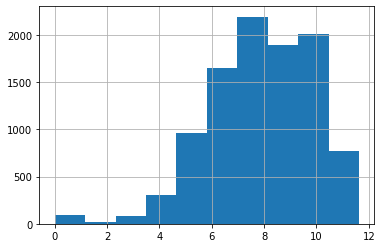

In [106]:
data['Population_Log'].hist()
plt.show()

In [107]:
data['Income_Log'] = np.log(data['Income'])

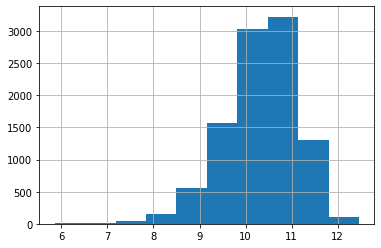

In [108]:
data['Income_Log'].hist()
plt.show()

In [109]:
contract_mapping = {'Month-to-month': 1, 'One year': 2, 'Two Year': 3}

data['Contract_Ordinal'] = data['Contract'].map(contract_mapping)

In [110]:
data['Tenure_Log'] = np.log(data['Tenure'])

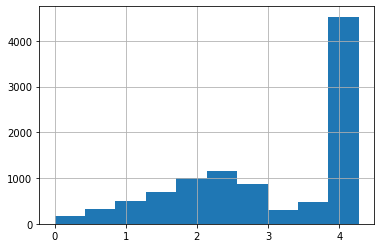

In [111]:
data['Tenure_Log'].hist()
plt.show()

In [112]:
data['Bandwidth_Log'] = np.log1p(data['Bandwidth_GB_Year'])

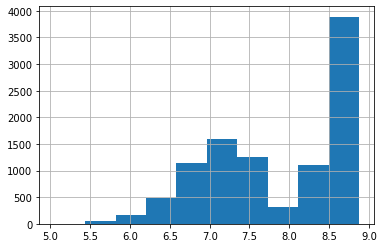

In [113]:
data['Bandwidth_Log'].hist()
plt.show()

In [114]:
data.shape

(10000, 55)

In [115]:
region_mapping = {'AK': 'Alaska', 'MI': 'Great_Lakes', 'OR': 'West_Coast', 'CA': 'West_Coast', 
                 'TX': 'Southwest', 'GA': 'Southeast', 'TN': 'Southeast', 'OK': 'Southwest', 'FL': 'Southeast',
                 'OH': 'ORV', 'IA': 'Midwest', 'IL': 'Great_Lakes', 'WI': 'Great_Lakes', 'NC': 'Southeast',
                 'AL': 'Southeast', 'NM': 'Southwest', 'VT': 'Northeast', 'MD': 'Northeast', 'NY': 'Northeast',
                 'WA': 'West_Coast', 'CT': 'Northeast', 'NJ': 'Northeast', 'DC': 'Northeast', 'ND': 'Midwest',
                 'LA': 'Southeast', 'NE': 'Midwest', 'WV': 'ORV', 'AZ': 'Southwest', 'MO': 'Midwest', 
                 'WY': 'Midwest', 'MT': 'Midwest', 'VA': 'Southeast', 'KY': 'ORV', 'MN': 'Great_Lakes',
                 'KS': 'Midwest', 'MA': 'Northeast', 'IN': 'Midwest', 'SC': 'Southeast', 'NH': 'Northeast',
                 'DE': 'Northeast', 'MS': 'Southeast', 'ID': 'Western', 'AR': 'Southeast', 'SD': 'Midwest',
                 'CO': 'Midwest', 'HI': 'Hawaii', 'UT': 'Western', 'RI': 'Northeast', 'NV': 'Western', 
                  'PA': 'Northeast', 'PR': 'Puerto_Rico', 'ME': 'Northeast'}

In [116]:
data['Region'] = data['State'].map(region_mapping)

In [117]:
data['Region'].value_counts()

Southeast      2060
Northeast      1999
Midwest        1719
Great_Lakes    1184
Southwest      1032
ORV             844
West_Coast      815
Western         195
Alaska           77
Puerto_Rico      40
Hawaii           35
Name: Region, dtype: int64

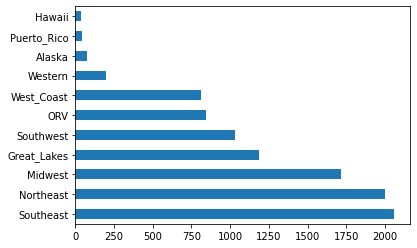

In [118]:
data['Region'].value_counts().plot(kind='barh')
plt.show()

In [119]:
numeric_cols = [col for col in data.columns if data[col].dtype in ['float64', 'int64']]
print(numeric_cols)

['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Population_Log', 'Income_Log', 'Contract_Ordinal', 'Tenure_Log', 'Bandwidth_Log']


In [120]:
categorical_cols = [col for col in data.columns if col not in numeric_cols]
print(categorical_cols)

['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Region']


In [121]:
numeric_cols.remove('CaseOrder')
numeric_cols.remove('Zip')
print(numeric_cols)

['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Population_Log', 'Income_Log', 'Contract_Ordinal', 'Tenure_Log', 'Bandwidth_Log']


In [122]:
categorical_cols.remove('Customer_id')
categorical_cols.remove('Interaction')
categorical_cols.remove('UID')
categorical_cols.remove('City')
categorical_cols.remove('State')
categorical_cols.remove('County')
categorical_cols.remove('TimeZone')
categorical_cols.remove('Job')
categorical_cols.remove('Contract')
print(categorical_cols)

['Area', 'Marital', 'Gender', 'Churn', 'Techie', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Region']


In [123]:
oh_enc_cols = [col for col in categorical_cols if data[col].nunique() > 2]
print(oh_enc_cols)

['Area', 'Marital', 'Gender', 'InternetService', 'PaymentMethod', 'Region']


In [124]:
le_cols = [col for col in categorical_cols if col not in oh_enc_cols]
print(le_cols)

['Churn', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']


In [125]:
outlier_id_cols = ['Lat',
 'Lng',
 'Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8']
outlier_id_cols

['Lat',
 'Lng',
 'Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8']

In [126]:
outlier_id_df = data[outlier_id_cols]

In [127]:
for col in outlier_id_df.columns:
    print(col, stats.shapiro(outlier_id_df[col]))

Lat ShapiroResult(statistic=0.9601455926895142, pvalue=1.401298464324817e-45)
Lng ShapiroResult(statistic=0.9020202159881592, pvalue=0.0)
Population ShapiroResult(statistic=0.6966826915740967, pvalue=0.0)
Children ShapiroResult(statistic=0.836870014667511, pvalue=0.0)
Age ShapiroResult(statistic=0.9543271064758301, pvalue=0.0)
Income ShapiroResult(statistic=0.8934258222579956, pvalue=0.0)
Outage_sec_perweek ShapiroResult(statistic=0.9997866749763489, pvalue=0.4358324408531189)
Email ShapiroResult(statistic=0.9906892776489258, pvalue=4.795065374406501e-25)
Contacts ShapiroResult(statistic=0.8337748050689697, pvalue=0.0)
Yearly_equip_failure ShapiroResult(statistic=0.6415181159973145, pvalue=0.0)
Tenure ShapiroResult(statistic=0.8307580947875977, pvalue=0.0)
MonthlyCharge ShapiroResult(statistic=0.9796265363693237, pvalue=1.9805499953835702e-35)
Bandwidth_GB_Year ShapiroResult(statistic=0.8582534193992615, pvalue=0.0)
Item1 ShapiroResult(statistic=0.9216778874397278, pvalue=0.0)
Item2 Sh

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [128]:
for col in outlier_id_df.columns:
    outlier_id_df[f'{col}_IQR'] = stats.iqr(outlier_id_df[col])
    outlier_id_df[f'{col}_lower'] = np.percentile(outlier_id_df[col], 25) - (1.5 * outlier_id_df[f'{col}_IQR'])
    outlier_id_df[f'{col}_upper'] = np.percentile(outlier_id_df[col], 75) + (1.5 * outlier_id_df[f'{col}_IQR'])

<ipython-input-128-28de8e82c456>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_id_df[f'{col}_IQR'] = stats.iqr(outlier_id_df[col])
<ipython-input-128-28de8e82c456>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_id_df[f'{col}_lower'] = np.percentile(outlier_id_df[col], 25) - (1.5 * outlier_id_df[f'{col}_IQR'])
<ipython-input-128-28de8e82c456>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

<ipython-input-128-28de8e82c456>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_id_df[f'{col}_lower'] = np.percentile(outlier_id_df[col], 25) - (1.5 * outlier_id_df[f'{col}_IQR'])
<ipython-input-128-28de8e82c456>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_id_df[f'{col}_upper'] = np.percentile(outlier_id_df[col], 75) + (1.5 * outlier_id_df[f'{col}_IQR'])
<ipython-input-128-28de8e82c456>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [129]:
for col in outlier_id_df.columns:
    if outlier_id_df[col].nunique() >= 2:
        outlier_id_df[f'{col}_outlier'] = [0 if outlier_id_df[col][i] > outlier_id_df[f'{col}_lower'][i] and outlier_id_df[col][i] < outlier_id_df[f'{col}_upper'][i] else 1 for i in range(len(outlier_id_df))] 

In [130]:
outlier_id_df.columns

Index(['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       ...
       'MonthlyCharge_outlier', 'Bandwidth_GB_Year_outlier', 'Item1_outlier',
       'Item2_outlier', 'Item3_outlier', 'Item4_outlier', 'Item5_outlier',
       'Item6_outlier', 'Item7_outlier', 'Item8_outlier'],
      dtype='object', length=105)

In [131]:
for col in outlier_id_df.columns[:21]:
    print(col, np.sum(outlier_id_df[f'{col}_outlier']))

Lat 158
Lng 273
Population 937
Children 401
Age 0
Income 336
Outage_sec_perweek 76
Email 120
Contacts 28
Yearly_equip_failure 94
Tenure 0
MonthlyCharge 0
Bandwidth_GB_Year 0
Item1 442
Item2 445
Item3 418
Item4 433
Item5 422
Item6 413
Item7 454
Item8 426


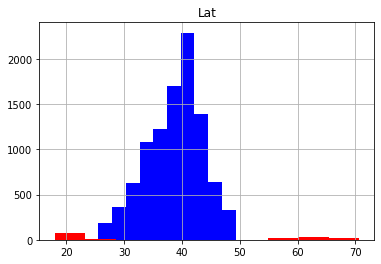

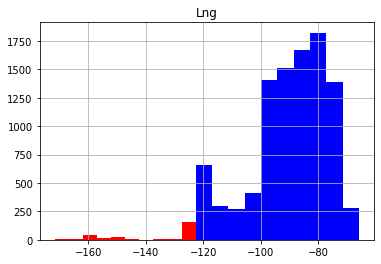

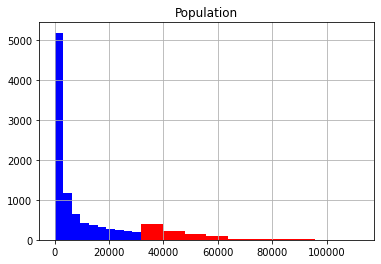

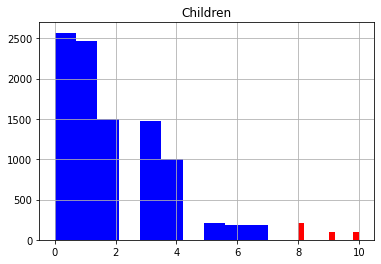

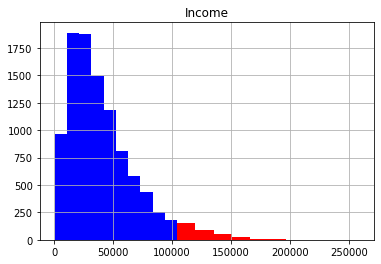

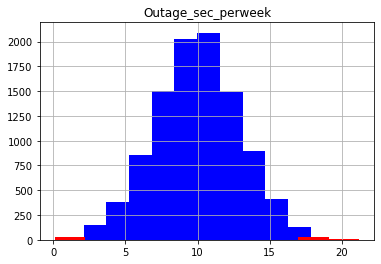

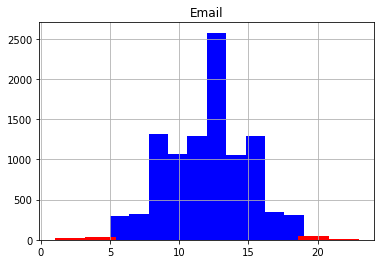

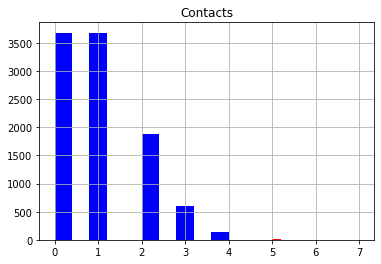

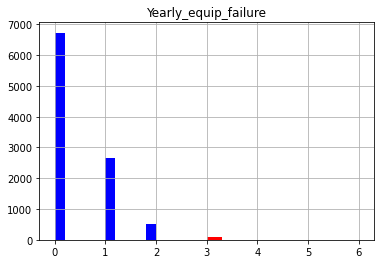

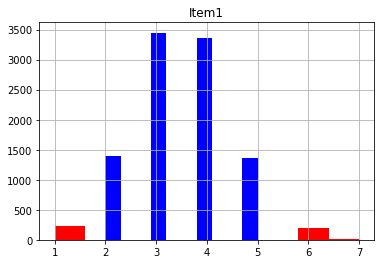

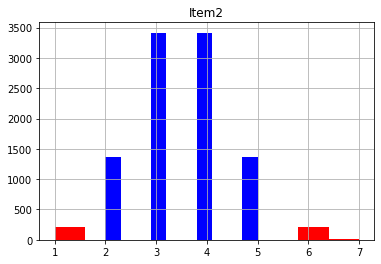

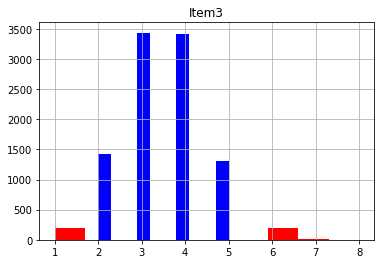

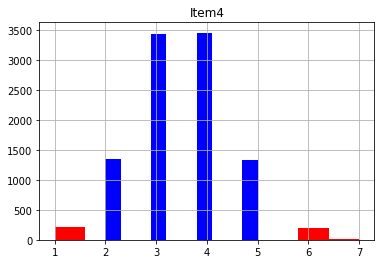

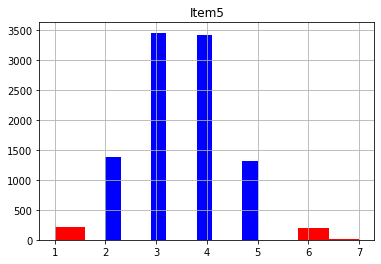

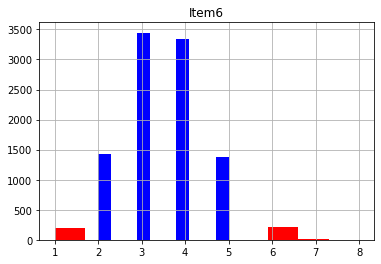

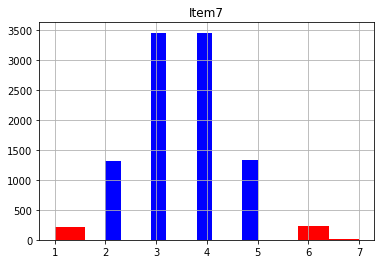

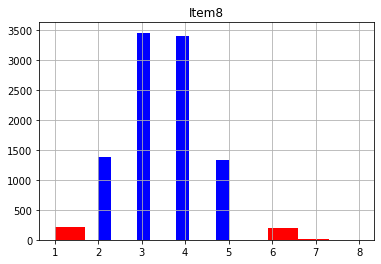

In [132]:
for col in outlier_id_df.columns[:21]:
    if np.sum(outlier_id_df[f'{col}_outlier']) > 0:
        fig, ax = plt.subplots()
        col_no_outlier = outlier_id_df.loc[outlier_id_df[f'{col}_outlier']==0, f'{col}']
        col_outlier = outlier_id_df.loc[outlier_id_df[f'{col}_outlier']==1, f'{col}']
        col_no_outlier.hist(color='blue')
        col_outlier.hist(color='red')
        plt.title(f'{col}')

In [133]:
numeric_df = data[numeric_cols]

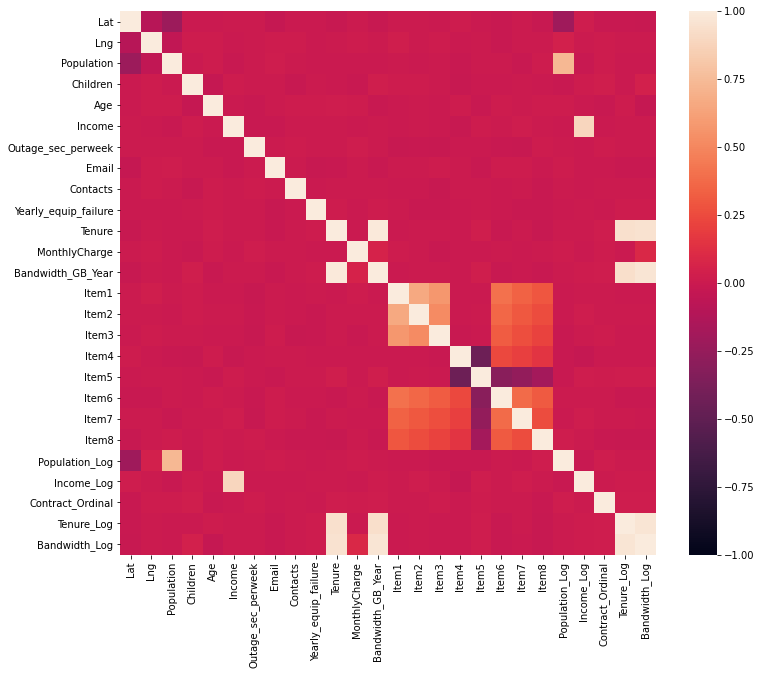

In [134]:
corr_mat = numeric_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_mat, vmin=-1, vmax=1)
plt.show()

In [135]:
for col1 in numeric_df.columns:
    for col2 in numeric_df.columns:
        if abs(numeric_df[col1].corr(numeric_df[col2])) > 0.3 and abs(numeric_df[col1].corr(numeric_df[col2])) < 1:
            print(f'{col1} vs. {col2}: {numeric_df[col1].corr(numeric_df[col2])}')

Lng vs. Lng: 0.9999999999999999
Population vs. Population_Log: 0.7288886627434153
Income vs. Income_Log: 0.8829900134538141
Contacts vs. Contacts: 0.9999999999999999
Tenure vs. Bandwidth_GB_Year: 0.9914951921640125
Tenure vs. Tenure_Log: 0.9417676012490847
Tenure vs. Bandwidth_Log: 0.9502945322271565
Bandwidth_GB_Year vs. Tenure: 0.9914951921640124
Bandwidth_GB_Year vs. Tenure_Log: 0.934279905772443
Bandwidth_GB_Year vs. Bandwidth_Log: 0.9657565223255514
Item1 vs. Item2: 0.6630687413300218
Item1 vs. Item3: 0.5780125331949714
Item1 vs. Item6: 0.40280369815191575
Item1 vs. Item7: 0.3367822736634495
Item2 vs. Item1: 0.6630687413300218
Item2 vs. Item2: 0.9999999999999998
Item2 vs. Item3: 0.5201942172468236
Item2 vs. Item6: 0.3632470028101065
Item2 vs. Item7: 0.3003239041015097
Item3 vs. Item1: 0.5780125331949714
Item3 vs. Item2: 0.5201942172468236
Item3 vs. Item3: 0.9999999999999998
Item3 vs. Item6: 0.3168449990935463
Item4 vs. Item4: 0.9999999999999998
Item4 vs. Item5: -0.438099675660348


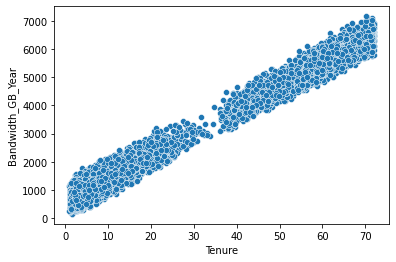

In [136]:
sns.scatterplot(x='Tenure', y='Bandwidth_GB_Year', data=data)
plt.show()

In [137]:
churn_comparison_cols = list(numeric_df.columns) 

In [138]:
#for col in churn_comparison_cols:
    #if col != 'Churn':
        #print(f'{col} vs. Churn: ', pointbiserialr(data[col], data['Churn']))

In [139]:
numeric_cols_with_log = [col for col in numeric_cols if col not in ['Population', 'Income', 'Tenure', 
                                                                   'Bandwidth_GB_Year']]
numeric_cols_original = [col for col in numeric_cols if col not in ['Population_Log', 'Income_Log', 'Tenure_Log', 
                                                                   'Bandwidth_Log']]

In [140]:
print(numeric_cols_with_log)

['Lat', 'Lng', 'Children', 'Age', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'MonthlyCharge', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Population_Log', 'Income_Log', 'Contract_Ordinal', 'Tenure_Log', 'Bandwidth_Log']


In [141]:
print(numeric_cols_original)

['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Contract_Ordinal']


In [142]:
print(len(numeric_cols_with_log)==len(numeric_cols_original))

True


In [143]:
df_numeric_log = data[numeric_cols_with_log]
df_numeric_original = data[numeric_cols_original]

In [144]:
df_le = data[le_cols]

In [145]:
for col in df_le.columns:
    le = LabelEncoder()
    df_le[f'LE_{col}'] = le.fit_transform(df_le[col])

<ipython-input-145-29e1f81d955d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_le[f'LE_{col}'] = le.fit_transform(df_le[col])
<ipython-input-145-29e1f81d955d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_le[f'LE_{col}'] = le.fit_transform(df_le[col])
<ipython-input-145-29e1f81d955d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [146]:
df_le[['Churn', 'LE_Churn']].head()

,Churn,LE_Churn
0,No,0
1,Yes,1
2,No,0
3,No,0
4,Yes,1


In [147]:
final_le_cols = [col for col in df_le.columns if col.startswith('LE_')]
print(final_le_cols)

['LE_Churn', 'LE_Techie', 'LE_Port_modem', 'LE_Tablet', 'LE_Phone', 'LE_Multiple', 'LE_OnlineSecurity', 'LE_OnlineBackup', 'LE_DeviceProtection', 'LE_TechSupport', 'LE_StreamingTV', 'LE_StreamingMovies', 'LE_PaperlessBilling']


In [148]:
df_le_final = df_le[final_le_cols]

In [149]:
for col in churn_comparison_cols:
    print(f'{col} vs. Churn: ', pointbiserialr(data[col], df_le_final['LE_Churn']))

Lat vs. Churn:  PointbiserialrResult(correlation=0.009386672312644773, pvalue=0.3479512707807412)
Lng vs. Churn:  PointbiserialrResult(correlation=-0.004602574047029533, pvalue=0.6453710156210573)
Population vs. Churn:  PointbiserialrResult(correlation=-0.008533378021441548, pvalue=0.39352253168914536)
Children vs. Churn:  PointbiserialrResult(correlation=-0.004264004276886051, pvalue=0.6698535122650369)
Age vs. Churn:  PointbiserialrResult(correlation=0.005629555238683833, pvalue=0.5735100554902612)
Income vs. Churn:  PointbiserialrResult(correlation=0.0059373833185262, pvalue=0.5527332919057756)
Outage_sec_perweek vs. Churn:  PointbiserialrResult(correlation=-0.00015640805888897423, pvalue=0.9875225110389961)
Email vs. Churn:  PointbiserialrResult(correlation=0.012326240427571765, pvalue=0.21775610450344843)
Contacts vs. Churn:  PointbiserialrResult(correlation=0.00856676170053583, pvalue=0.3916743913273157)
Yearly_equip_failure vs. Churn:  PointbiserialrResult(correlation=-0.0159271

In [150]:
for col1 in churn_comparison_cols:
    for col2 in df_le_final.columns:
        if col2 != 'LE_Churn':
            print(f'{col1} vs. {col2}: ', pointbiserialr(data[col1], df_le_final[col2]))
        
    

Lat vs. LE_Techie:  PointbiserialrResult(correlation=0.009987071068977626, pvalue=0.3179850288770104)
Lat vs. LE_Port_modem:  PointbiserialrResult(correlation=-0.019988167742854536, pvalue=0.045633616109067444)
Lat vs. LE_Tablet:  PointbiserialrResult(correlation=0.001607718442491374, pvalue=0.8722888496583835)
Lat vs. LE_Phone:  PointbiserialrResult(correlation=-0.0056394970829636275, pvalue=0.5728332879227178)
Lat vs. LE_Multiple:  PointbiserialrResult(correlation=-0.006479147364461925, pvalue=0.5170880907263758)
Lat vs. LE_OnlineSecurity:  PointbiserialrResult(correlation=-0.005408713733565325, pvalue=0.5886401240359362)
Lat vs. LE_OnlineBackup:  PointbiserialrResult(correlation=-0.013009102963903226, pvalue=0.1933259933331456)
Lat vs. LE_DeviceProtection:  PointbiserialrResult(correlation=0.017593507546104867, pvalue=0.07853217337868226)
Lat vs. LE_TechSupport:  PointbiserialrResult(correlation=-0.009163943267101626, pvalue=0.35951008782801436)
Lat vs. LE_StreamingTV:  Pointbiseria

Yearly_equip_failure vs. LE_OnlineSecurity:  PointbiserialrResult(correlation=-0.016485944505315223, pvalue=0.09925003192913055)
Yearly_equip_failure vs. LE_OnlineBackup:  PointbiserialrResult(correlation=-0.011500450133642391, pvalue=0.2501688834802557)
Yearly_equip_failure vs. LE_DeviceProtection:  PointbiserialrResult(correlation=-0.0059032650886357, pvalue=0.5550177889856194)
Yearly_equip_failure vs. LE_TechSupport:  PointbiserialrResult(correlation=0.0037354142585993727, pvalue=0.7087792969995392)
Yearly_equip_failure vs. LE_StreamingTV:  PointbiserialrResult(correlation=0.002597438291264191, pvalue=0.795086091878023)
Yearly_equip_failure vs. LE_StreamingMovies:  PointbiserialrResult(correlation=-0.004473333642840008, pvalue=0.6546731351761617)
Yearly_equip_failure vs. LE_PaperlessBilling:  PointbiserialrResult(correlation=0.016603263763661103, pvalue=0.09686753762687704)
Tenure vs. LE_Techie:  PointbiserialrResult(correlation=-0.010040749589809871, pvalue=0.31539078550024935)
Ten

Item8 vs. LE_DeviceProtection:  PointbiserialrResult(correlation=0.007111776570706907, pvalue=0.4770236664583638)
Item8 vs. LE_TechSupport:  PointbiserialrResult(correlation=0.009137279165007442, pvalue=0.36090984416714594)
Item8 vs. LE_StreamingTV:  PointbiserialrResult(correlation=0.008203888420010085, pvalue=0.4120450549816425)
Item8 vs. LE_StreamingMovies:  PointbiserialrResult(correlation=-0.0034004552028573526, pvalue=0.7338535193734076)
Item8 vs. LE_PaperlessBilling:  PointbiserialrResult(correlation=0.009655922326305343, pvalue=0.33429742358259745)
Population_Log vs. LE_Techie:  PointbiserialrResult(correlation=-0.009873749006210646, pvalue=0.32350758072996777)
Population_Log vs. LE_Port_modem:  PointbiserialrResult(correlation=-0.004506857920098849, pvalue=0.6522549857644029)
Population_Log vs. LE_Tablet:  PointbiserialrResult(correlation=0.0008821697681601036, pvalue=0.9297129754499291)
Population_Log vs. LE_Phone:  PointbiserialrResult(correlation=0.009086442059683304, pvalu

In [151]:
df_oh = data[oh_enc_cols]

In [152]:
df_oh_final = pd.get_dummies(df_oh, drop_first=True)

In [153]:
df_log = pd.concat([df_numeric_log, df_le_final, df_oh_final], axis=1)
df_original = pd.concat([df_numeric_original, df_le_final, df_oh_final], axis=1)

In [154]:
#df_log.head()

In [155]:
#df_original.head()

In [156]:
#X = df_log.drop('LE_Churn', axis=1)
#y = df_log['LE_Churn']

In [157]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [158]:
#model1 = LogisticRegression()
#model1.fit(X_train, y_train)
#preds = model1.predict(X_test)

In [159]:
#print(classification_report(y_test, preds))

In [160]:
#X = df_original.drop('LE_Churn', axis=1)
#y = df_original['LE_Churn']

In [161]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [162]:
#model2 = LogisticRegression()
#model2.fit(X_train, y_train)
#preds = model2.predict(X_test)

In [163]:
#print(classification_report(y_test, preds))

In [164]:
#X = df_log.drop('LE_Churn', axis=1)
#y = df_log['LE_Churn']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#scaler = StandardScaler()

#X_train_scaled = scaler.fit_transform(X_train.loc[:, numeric_cols_with_log])
#X_test_scaled = scaler.transform(X_test.loc[:, numeric_cols_with_log])

In [165]:
#X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_cols_with_log)
#X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_cols_with_log)

In [166]:
#X_train_scaled.head()

In [167]:
#X_train.columns

In [168]:
#non_scaled_cols = [col for col in X_train.columns if col not in numeric_cols_with_log]
#print(non_scaled_cols)

In [169]:
#X_train_new = pd.concat([X_train_scaled, X_train.loc[:, non_scaled_cols]], axis=1)
#X_test_new = pd.concat([X_test_scaled, X_test.loc[:, non_scaled_cols]], axis=1)

In [170]:
#X_train_new.head()

In [171]:
X = df_log.drop('LE_Churn', axis=1)
y = df_log['LE_Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

scaler = StandardScaler()

X_train.loc[:, numeric_cols_with_log] = scaler.fit_transform(X_train.loc[:, numeric_cols_with_log])
X_test.loc[:, numeric_cols_with_log] = scaler.transform(X_test.loc[:, numeric_cols_with_log])

In [172]:
#X_train.head()

In [173]:
#X_test.head()

In [174]:
model3 = LogisticRegression()
model3.fit(X_train, y_train)
preds = model3.predict(X_test)

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [175]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1838
           1       0.79      0.72      0.75       662

    accuracy                           0.88      2500
   macro avg       0.85      0.83      0.84      2500
weighted avg       0.87      0.88      0.87      2500



In [176]:
X = df_original.drop('LE_Churn', axis=1)
y = df_original['LE_Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

scaler = StandardScaler()

X_train.loc[:, numeric_cols_original] = scaler.fit_transform(X_train.loc[:, numeric_cols_original])
X_test.loc[:, numeric_cols_original] = scaler.transform(X_test.loc[:, numeric_cols_original])

In [177]:
model4 = LogisticRegression()
model4.fit(X_train, y_train)
preds = model4.predict(X_test)

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [178]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1838
           1       0.80      0.75      0.77       662

    accuracy                           0.88      2500
   macro avg       0.85      0.84      0.85      2500
weighted avg       0.88      0.88      0.88      2500



In [179]:
#X_train_ols = sm.add_constant(X_train, prepend=True)

#sm_model1 = sm.Logit(y_train, X_train_ols).fit()
#print(sm_model1.summary())

In [180]:
#vif_data = pd.DataFrame()
#vif_data['feature'] = X_train.columns

#vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
#vif_data

In [181]:
scaler = StandardScaler()

X.loc[:, numeric_cols_original] = scaler.fit_transform(X.loc[:, numeric_cols_original])

X_ols = sm.add_constant(X, prepend=True)

sm_model2 = sm.Logit(y, X_ols).fit()
print(sm_model2.summary())

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.228010
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               LE_Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9942
Method:                           MLE   Df Model:                           57
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                  0.6057
Time:                        11:52:50   Log-Likelihood:                -2280.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.0864      

In [182]:
#X.head()

In [183]:
vif_data_original = pd.DataFrame()
vif_data_original['feature'] = X.columns

vif_data_original['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data_original

,feature,VIF
0,Lat,3.599450
1,Lng,9.127908
2,Population,1.124086
3,Children,38.095769
4,Age,40.169195
5,Income,1.004888
6,Outage_sec_perweek,1.006457
7,Email,1.005701
8,Contacts,1.004546
9,Yearly_equip_failure,1.005767


In [184]:
#model5 = LogisticRegression()

#parameters = [{'penalty':['l1','none'], 
              #'C':[0.1, 1, 10, 100],
              #'class_weight': ['balanced', 'None']}]

#grid = GridSearchCV(estimator=model5, param_grid=parameters, scoring='accuracy', cv=5, verbose=0)

#grid.fit(X, y)

In [185]:
#grid.best_params_

In [186]:
#grid.best_score_

In [187]:
#X.head()

In [188]:
#y.head()

In [189]:
#model6 = LogisticRegression()

#min_features_to_select = 1
#rfecv = RFECV(estimator=model6, step=1, cv=StratifiedKFold(5), scoring='accuracy',
             #min_features_to_select=min_features_to_select)
#rfecv.fit(X, y)

In [190]:
#print(rfecv.n_features_)

In [191]:
#plt.figure()
#plt.xlabel('Num Features Selected')
#plt.ylabel('Accuracy')
#plt.plot(range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select), rfecv.grid_scores_)
#plt.show()

In [192]:
#model7 = LogisticRegression(C=0.1)

#min_features_to_select = 1

#rfecv = RFECV(estimator=model7, step=1, cv=StratifiedKFold(5), scoring='accuracy',
             #min_features_to_select=min_features_to_select)
#rfecv.fit(X, y)

In [193]:
#print(rfecv.n_features_)

In [194]:
#plt.figure()
#plt.xlabel('Num Features Selected')
#plt.ylabel('Accuracy')
#plt.plot(range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select), rfecv.grid_scores_)
#plt.show()

In [195]:
#features_unfiltered = rfecv.feature_names_in_

#feature_index = np.where(rfecv.ranking_ == 1)

#features_filtered = features_unfiltered[feature_index]

#features_filtered

In [196]:
#X_filtered = X[list(features_filtered)]

#X_reduced = sm.add_constant(X_filtered, prepend=True)

#sm_model3 = sm.Logit(y, X_reduced).fit()
#print(sm_model3.summary())

In [197]:
#vif_data2 = pd.DataFrame()
#vif_data2['feature'] = X_filtered.columns

#vif_data2['VIF'] = [variance_inflation_factor(X_filtered.values, i) for i in range(len(X_filtered.columns))]
#vif_data2

In [198]:
#features_filtered = list(features_filtered)
#features_filtered

In [199]:
#features_filtered

In [200]:
#features_filtered.remove('Bandwidth_GB_Year')

In [201]:
#X_filtered = X[features_filtered]

#X_reduced = sm.add_constant(X_filtered, prepend=True)

#sm_model4 = sm.Logit(y, X_reduced).fit()
#print(sm_model4.summary())

In [202]:
#vif_data3 = pd.DataFrame()
#vif_data3['feature'] = X_filtered.columns

#vif_data3['VIF'] = [variance_inflation_factor(X_filtered.values, i) for i in range(len(X_filtered.columns))]
#vif_data3

In [203]:
#model8 = LogisticRegression(C=0.1)

#X_final = df_original[features_filtered]
#y_final = df_original['LE_Churn']

#k_fold_final = StratifiedKFold(n_splits=5)

#scale_features = [col for col in numeric_cols_original if col in X_final.columns]

#for i, (train_index, test_index) in enumerate(k_fold_final.split(X_final, y_final)):
    #X_train, y_train = X_final.iloc[train_index], y_final.iloc[train_index]
    #X_test, y_test = X_final.iloc[test_index], y_final.iloc[test_index]
    
    #scaler = StandardScaler()
    
    #X_train.loc[:, scale_features] = scaler.fit_transform(X_train.loc[:, scale_features])
    #X_test.loc[:, scale_features] = scaler.transform(X_test.loc[:, scale_features])
    
    #model8.fit(X_train, y_train)
    #preds = model8.predict(X_test)
    
    #print(f'Fold {i}:')
    #print(classification_report(y_test, preds))
    

In [204]:
#model9 = LogisticRegression()

#scaler = StandardScaler()

#min_features_to_select = 1

#rfecv = RFECV(estimator=model9, step=1, cv=StratifiedKFold(5), scoring='accuracy',
             #min_features_to_select=min_features_to_select)

#pipe = Pipeline(steps=[("scaler", scaler), ('logistic', model9)])

#param_grid = {'logistic__C': np.logspace(-4, 4, 4)}

#search = GridSearchCV(pipe, param_grid, n_jobs=2)

#X_final2 = df_original.drop('LE_Churn', axis=1)
#y_final2 = df_original['LE_Churn']

#search.fit(X_final2, y_final2)

#print(search.best_params_)
#print(search.best_score_)

In [205]:
#df_original.head()

In [206]:
#pipe = Pipeline([("reduce_dim", "passthrough"),
                 #("classify", LogisticRegression())])

#N_FEATURES_OPTIONS = list(range(1, len(df_original.columns)))
#C_OPTIONS = [0.1, 1, 10, 100]

#param_grid = [{"reduce_dim": [SelectKBest()],"reduce_dim__k": N_FEATURES_OPTIONS,"classify__C": C_OPTIONS}]

#grid = GridSearchCV(pipe, n_jobs=2, param_grid=param_grid)

#X_final3 = df_original.drop('LE_Churn', axis=1)
#y_final3 = df_original['LE_Churn']

#scaler = StandardScaler()
    
#X_final3.loc[:, numeric_cols_original] = scaler.fit_transform(X_final3.loc[:, numeric_cols_original])

#grid.fit(X_final3, y_final3)

#print(grid.best_params_)
#print(grid.best_score_)

In [207]:
#pipe = Pipeline([("reduce_dim", "passthrough"),
                 #("classify", LogisticRegression())])

#N_FEATURES_OPTIONS = list(range(1, len(df_original.columns)))
#C_OPTIONS = [0.1, 1, 10, 100]

#param_grid = [{"reduce_dim": [SelectKBest()],"reduce_dim__k": N_FEATURES_OPTIONS,"classify__C": C_OPTIONS}]

#grid2 = GridSearchCV(pipe, n_jobs=2, param_grid=param_grid)

#X_final4 = df_original.drop('LE_Churn', axis=1)
#y_final4 = df_original['LE_Churn']

#scaler = StandardScaler()
    
#X_final4.loc[:, numeric_cols_original] = scaler.fit_transform(X_final4.loc[:, numeric_cols_original])

#grid2.fit(X_final4, y_final4)

#print(grid2.best_params_)
#print(grid2.best_score_)

In [208]:
#grid.cv_results_

In [209]:
#dir(grid)

In [210]:
#grid.feature_names_in_

In [211]:
#grid._check_feature_names

In [212]:
#grid.best_params_

In [213]:
#grid._select_best_index

In [214]:
#grid.get_params

In [215]:
#grid.classes_

In [216]:
#grid.n_features_in_

In [217]:
#grid.best_index_

In [218]:
#X_final5 = df_original.drop('LE_Churn', axis=1)
#y_final5 = df_original['LE_Churn']

#X_final5_new = SelectKBest(k=13).fit_transform(X_final5, y_final5)
#print(X_final5_new.columns)

In [219]:
#X_final5_new

In [220]:
#X_final5_new.get_feature_names_out_

In [221]:
#k_best = SelectKBest(k=13).fit(X_final5, y_final5).get_feature_names_out()

In [222]:
#X_kbest = df_original[list(k_best)]

#X_kbest_sm = sm.add_constant(X_kbest, prepend=True)

#sm_model5 = sm.Logit(y, X_kbest_sm).fit()
#print(sm_model5.summary())

In [223]:
#kbest_params = list(k_best)
#kbest_params.remove('LE_OnlineBackup')

#X_kbest2 = df_original[kbest_params]

#X_kbest_sm2 = sm.add_constant(X_kbest2, prepend=True)

#sm_model6 = sm.Logit(y, X_kbest_sm2).fit()
#print(sm_model6.summary())

In [224]:
#kbest_params.remove('LE_DeviceProtection')

#X_kbest3 = df_original[kbest_params]

#X_kbest_sm3 = sm.add_constant(X_kbest3, prepend=True)

#sm_model7 = sm.Logit(y, X_kbest_sm3).fit()
#print(sm_model7.summary())

In [225]:
#kbest_params.remove('Bandwidth_GB_Year')

#X_kbest4 = df_original[kbest_params]

#X_kbest_sm4 = sm.add_constant(X_kbest4, prepend=True)

#sm_model8 = sm.Logit(y, X_kbest_sm4).fit()
#print(sm_model8.summary())

In [226]:
#vif_data4 = pd.DataFrame()
#vif_data4['feature'] = X_kbest4.columns

#vif_data4['VIF'] = [variance_inflation_factor(X_kbest4.values, i) for i in range(len(X_kbest4.columns))]
#vif_data4

In [227]:
#model10 = LogisticRegression()

#X_kselections = df_original[kbest_params]
#y_kselections = df_original['LE_Churn']

#k_fold_final = StratifiedKFold(n_splits=5)

#scale_features = [col for col in numeric_cols_original if col in X_kselections.columns]

#for i, (train_index, test_index) in enumerate(k_fold_final.split(X_kselections, y_kselections)):
    #X_train, y_train = X_kselections.iloc[train_index], y_kselections.iloc[train_index]
    #X_test, y_test = X_kselections.iloc[test_index], y_kselections.iloc[test_index]
    
    #scaler = StandardScaler()
    
    #X_train.loc[:, scale_features] = scaler.fit_transform(X_train.loc[:, scale_features])
    #X_test.loc[:, scale_features] = scaler.transform(X_test.loc[:, scale_features])
    
    #model10.fit(X_train, y_train)
    #preds = model10.predict(X_test)
    
    #print(f'Fold {i}:')
    #print('Accuracy Score: ', accuracy_score(y_test, preds))
    #print('Precision Score: ', precision_score(y_test, preds))
    #print('Recall Score: ', recall_score(y_test, preds))
    

In [228]:
#features_filtered

In [229]:
#model11 = LogisticRegression()

#X_final = df_original[features_filtered]
#y_final = df_original['LE_Churn']

#k_fold_final = StratifiedKFold(n_splits=5)

#scale_features = [col for col in numeric_cols_original if col in X_final.columns]

#for i, (train_index, test_index) in enumerate(k_fold_final.split(X_final, y_final)):
   # X_train, y_train = X_final.iloc[train_index], y_final.iloc[train_index]
    #X_test, y_test = X_final.iloc[test_index], y_final.iloc[test_index]
    
    #scaler = StandardScaler()
    
    #X_train.loc[:, scale_features] = scaler.fit_transform(X_train.loc[:, scale_features])
    #X_test.loc[:, scale_features] = scaler.transform(X_test.loc[:, scale_features])
    
   # model11.fit(X_train, y_train)
   # preds = model11.predict(X_test)
    
    #print(f'Fold {i}:')
   # print('Accuracy Score: ', accuracy_score(y_test, preds))
   # print('Precision Score: ', precision_score(y_test, preds))
   # print('Recall Score: ', recall_score(y_test, preds))

In [230]:
#model12 = LogisticRegression()

#X_final = df_original.drop('LE_Churn', axis=1)
#y_final = df_original['LE_Churn']

#k_fold_final = StratifiedKFold(n_splits=5)

#scale_features = [col for col in numeric_cols_original if col in X_final.columns]

#for i, (train_index, test_index) in enumerate(k_fold_final.split(X_final, y_final)):
    #X_train, y_train = X_final.iloc[train_index], y_final.iloc[train_index]
    #X_test, y_test = X_final.iloc[test_index], y_final.iloc[test_index]
    
    #scaler = StandardScaler()
    
    #X_train.loc[:, scale_features] = scaler.fit_transform(X_train.loc[:, scale_features])
   # X_test.loc[:, scale_features] = scaler.transform(X_test.loc[:, scale_features])
    
   # model12.fit(X_train, y_train)
   # preds = model12.predict(X_test)
    
  #  print(f'Fold {i}:')
    #print('Accuracy Score: ', accuracy_score(y_test, preds))
   # print('Precision Score: ', precision_score(y_test, preds))
   # print('Recall Score: ', recall_score(y_test, preds))

In [231]:
#model13 = LogisticRegression()

#min_features_to_select = 1

#rfecv = RFECV(estimator=model13, step=1, cv=StratifiedKFold(5), scoring='roc_auc',
             #min_features_to_select=min_features_to_select)
#rfecv.fit(X_final, y_final)

In [232]:
#print(rfecv.n_features_)

In [233]:
#plt.figure()
#plt.xlabel('Num Features Selected')
#plt.ylabel('ROC_AUC')
#plt.plot(range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select), rfecv.grid_scores_)
#plt.show()

In [234]:
#features_unfiltered = rfecv.feature_names_in_

#feature_index = np.where(rfecv.ranking_ == 1)

#features_filtered = features_unfiltered[feature_index]

#features_filtered

In [235]:
#features_filtered_roc = list(features_filtered)

In [236]:
#X_filtered_roc = df_original[features_filtered_roc]

#X_filtered_sm5 = sm.add_constant(X_filtered_roc, prepend=True)

#sm_model9 = sm.Logit(y, X_filtered_sm5).fit()
#print(sm_model9.summary())

In [237]:
#vif_data5 = pd.DataFrame()
#vif_data5['feature'] = X_filtered_roc.columns

#vif_data5['VIF'] = [variance_inflation_factor(X_filtered_roc.values, i) for i in range(len(X_filtered_roc.columns))]
#vif_data5

In [238]:
#k_best = SelectKBest(k=13).fit(X_final5, y_final5).get_feature_names_out()

#features = []
#avg_acc = []
#avg_roc = []

#for i in range(1, len(X_filtered_roc.columns)+1):
    #k_best = SelectKBest(k=i).fit(X_filtered_roc, y).get_feature_names_out()
    #features.append(list(k_best))
    #X_final = X_filtered_roc[list(k_best)]
    #y_final = y
    
    #k_fold_final = StratifiedKFold(n_splits=5)

    #scale_features = [col for col in numeric_cols_original if col in X_final.columns]
    
    #accuracies = []
    #rocs = []

    #for i, (train_index, test_index) in enumerate(k_fold_final.split(X_final, y_final)):
        #X_train, y_train = X_final.iloc[train_index], y_final.iloc[train_index]
        #X_test, y_test = X_final.iloc[test_index], y_final.iloc[test_index]
    
        #scaler = StandardScaler()
    
        #X_train.loc[:, scale_features] = scaler.fit_transform(X_train.loc[:, scale_features])
        #X_test.loc[:, scale_features] = scaler.transform(X_test.loc[:, scale_features])
        
        #model = LogisticRegression()
    
        #model.fit(X_train, y_train)
        #preds = model.predict(X_test)
        
        #accuracy = accuracy_score(y_test, preds)
        #roc = roc_auc_score(y_test, preds)
        
        #accuracies.append(accuracy)
        #rocs.append(roc)
        
    #avg_acc.append(np.mean(accuracies))
    #avg_roc.append(np.mean(rocs))
        
        
    
    
    
    

In [239]:
#len(avg_roc)

In [240]:
#len(avg_acc)

In [241]:
#plt.figure(figsize=(8,6))
#plt.plot(range(0, len(avg_roc)), avg_roc, label='roc', color='blue')
#plt.plot(range(0, len(avg_acc)), avg_acc, label='accuracy', color='red')
#plt.legend()
#plt.show()

In [242]:
#print(np.max(avg_acc))

In [243]:
#print(np.max(avg_roc))

In [244]:
#print(np.argmax(avg_acc))

In [245]:
#print(np.argmax(avg_roc))

In [246]:
#print(features)

In [247]:
#print(features[11])

In [248]:
#print(features[12])

In [249]:
#print(avg_acc[11])

In [250]:
#print(avg_acc[12])

In [251]:
#print(avg_roc[11])

In [252]:
#print(avg_roc[12])

In [253]:
#features_max_acc = features[12]

In [254]:
#X_max_acc = df_original[features_max_acc]

#X_filtered_max_acc = sm.add_constant(X_max_acc, prepend=True)

#sm_model10 = sm.Logit(y, X_filtered_max_acc).fit()
#print(sm_model10.summary())

In [255]:
#vif_data6 = pd.DataFrame()
#vif_data6['feature'] = X_max_acc.columns

#vif_data6['VIF'] = [variance_inflation_factor(X_max_acc.values, i) for i in range(len(X_max_acc.columns))]
#vif_data6

In [256]:
#features_max_roc = features[11]

In [257]:
#X_max_roc = df_original[features_max_roc]

#X_filtered_max_roc = sm.add_constant(X_max_roc, prepend=True)

#sm_model11 = sm.Logit(y, X_filtered_max_roc).fit()
#print(sm_model11.summary())

In [258]:
#vif_data7 = pd.DataFrame()
#vif_data7['feature'] = X_max_roc.columns

#vif_data7['VIF'] = [variance_inflation_factor(X_max_roc.values, i) for i in range(len(X_max_roc.columns))]
#vif_data7

In [259]:
#avg_acc

In [260]:
#avg_roc

In [261]:
#features10 = features[10]

In [262]:
#X10 = df_original[features10]

#X_filtered_10 = sm.add_constant(X10, prepend=True)

#sm_model12 = sm.Logit(y, X_filtered_10).fit()
#print(sm_model12.summary())

In [263]:
#vif_data8 = pd.DataFrame()
#vif_data8['feature'] = X10.columns

#vif_data8['VIF'] = [variance_inflation_factor(X10.values, i) for i in range(len(X10.columns))]
#vif_data8

In [264]:
#features9 = features[9]

In [265]:
#X9 = df_original[features9]

#X_filtered_9 = sm.add_constant(X9, prepend=True)

#sm_model13 = sm.Logit(y, X_filtered_9).fit()
#print(sm_model13.summary())

In [266]:
#vif_data9 = pd.DataFrame()
#vif_data9['feature'] = X9.columns

#vif_data9['VIF'] = [variance_inflation_factor(X9.values, i) for i in range(len(X9.columns))]
#vif_data9

In [267]:
#features8 = features[8]

In [268]:
#X8 = df_original[features8]

#X_filtered_8 = sm.add_constant(X8, prepend=True)

#sm_model14 = sm.Logit(y, X_filtered_8).fit()
#print(sm_model14.summary())

In [269]:
#vif_data10 = pd.DataFrame()
#vif_data10['feature'] = X8.columns

#vif_data10['VIF'] = [variance_inflation_factor(X8.values, i) for i in range(len(X8.columns))]
#vif_data10

In [270]:
#features7 = features[7]

In [271]:
#X7 = df_original[features7]

#X_filtered_7 = sm.add_constant(X7, prepend=True)

#sm_model15 = sm.Logit(y, X_filtered_7).fit()
#print(sm_model15.summary())

In [272]:
#vif_data11 = pd.DataFrame()
#vif_data11['feature'] = X7.columns

#vif_data11['VIF'] = [variance_inflation_factor(X7.values, i) for i in range(len(X7.columns))]
#vif_data11

In [273]:
#features6 = features[6]

In [274]:
#X6 = df_original[features6]

#X_filtered_6 = sm.add_constant(X6, prepend=True)

#sm_model16 = sm.Logit(y, X_filtered_6).fit()
#print(sm_model16.summary())

In [275]:
#vif_data12 = pd.DataFrame()
#vif_data12['feature'] = X6.columns

#vif_data12['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(len(X6.columns))]
#vif_data12

In [276]:
#features5 = features[5]

In [277]:
#X5 = df_original[features5]

#X_filtered_5 = sm.add_constant(X5, prepend=True)

#sm_model17 = sm.Logit(y, X_filtered_5).fit()
#print(sm_model17.summary())

In [278]:
#vif_data13 = pd.DataFrame()
#vif_data13['feature'] = X5.columns

#vif_data13['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(len(X5.columns))]
#vif_data13

In [279]:
#

In [280]:
#print(features[12])

In [281]:
#print(features[11])

In [282]:
#diff = [col for col in interesting_features if col not in features[12]]
#diff

In [283]:
#print(features[13])

In [284]:
#X.head()

In [285]:
model_scaled = LogisticRegression()

min_features_to_select = 1

rfecv_scaled = RFECV(estimator=model_scaled, step=1, cv=StratifiedKFold(5), scoring='roc_auc',
             min_features_to_select=min_features_to_select)
rfecv_scaled.fit(X, y)

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(), scoring='roc_auc')

In [286]:
print(rfecv_scaled.n_features_)

27


/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


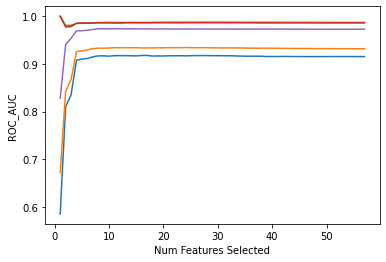

In [287]:
plt.figure()
plt.xlabel('Num Features Selected')
plt.ylabel('ROC_AUC')
plt.plot(range(min_features_to_select, len(rfecv_scaled.grid_scores_) + min_features_to_select), rfecv_scaled.grid_scores_)
plt.show()

In [288]:
features_unfiltered_scaled = rfecv_scaled.feature_names_in_

feature_index_scaled = np.where(rfecv_scaled.ranking_ == 1)

features_filtered_scaled = features_unfiltered_scaled[feature_index_scaled]

features_filtered_scaled

array(['Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Contract_Ordinal',
       'LE_Techie', 'LE_Port_modem', 'LE_Phone', 'LE_Multiple',
       'LE_OnlineSecurity', 'LE_OnlineBackup', 'LE_DeviceProtection',
       'LE_TechSupport', 'LE_StreamingTV', 'LE_StreamingMovies',
       'LE_PaperlessBilling', 'Marital_Married', 'Marital_Separated',
       'Marital_Widowed', 'Gender_Male', 'InternetService_Fiber Optic',
       'InternetService_None', 'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check',
       'Region_Northeast', 'Region_Puerto_Rico', 'Region_Western'],
      dtype=object)

In [289]:
features_filtered_roc_scaled = list(features_filtered_scaled)

In [290]:
X_filtered_roc_scaled = X[features_filtered_roc_scaled]

X_filtered_roc_scaled_sm = sm.add_constant(X_filtered_roc_scaled, prepend=True)

sm_model18 = sm.Logit(y, X_filtered_roc_scaled_sm).fit()
print(sm_model18.summary())

Optimization terminated successfully.
         Current function value: 0.228575
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               LE_Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9972
Method:                           MLE   Df Model:                           27
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                  0.6047
Time:                        11:53:29   Log-Likelihood:                -2285.8
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2762      

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [291]:
vif_data14 = pd.DataFrame()
vif_data14['feature'] = X_filtered_roc_scaled.columns

vif_data14['VIF'] = [variance_inflation_factor(X_filtered_roc_scaled.values, i) for i in range(len(X_filtered_roc_scaled.columns))]
vif_data14

,feature,VIF
0,Tenure,498.641628
1,MonthlyCharge,5.568860
2,Bandwidth_GB_Year,507.009428
3,Contract_Ordinal,1.003047
4,LE_Techie,1.201293
5,LE_Port_modem,1.928858
6,LE_Phone,10.003926
7,LE_Multiple,2.661735
8,LE_OnlineSecurity,1.754193
9,LE_OnlineBackup,2.277898


In [292]:
features_scaled = []
avg_acc_scaled = []
avg_roc_scaled = []

for i in range(1, len(X_filtered_roc_scaled.columns)+1):
    k_best = SelectKBest(k=i).fit(X_filtered_roc_scaled, y).get_feature_names_out()
    features_scaled.append(list(k_best))
    X_final = X_filtered_roc_scaled[list(k_best)]
    y_final = y
    
    k_fold_final = StratifiedKFold(n_splits=5)

   
    
    accuracies = []
    rocs = []

    for i, (train_index, test_index) in enumerate(k_fold_final.split(X_final, y_final)):
        X_train, y_train = X_final.iloc[train_index], y_final.iloc[train_index]
        X_test, y_test = X_final.iloc[test_index], y_final.iloc[test_index]
    
        
        model = LogisticRegression()
    
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, preds)
        roc = roc_auc_score(y_test, preds)
        
        accuracies.append(accuracy)
        rocs.append(roc)
        
    avg_acc_scaled.append(np.mean(accuracies))
    avg_roc_scaled.append(np.mean(rocs))

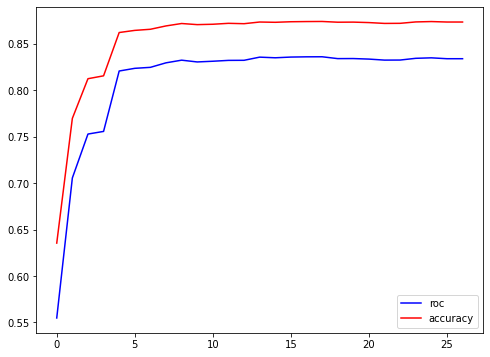

In [293]:
plt.figure(figsize=(8,6))
plt.plot(range(0, len(avg_roc_scaled)), avg_roc_scaled, label='roc', color='blue')
plt.plot(range(0, len(avg_acc_scaled)), avg_acc_scaled, label='accuracy', color='red')
plt.legend()
plt.show()

In [294]:
print(np.max(avg_acc_scaled))

0.8739000000000001


In [295]:
print(np.max(avg_roc_scaled))

0.8359145167500962


In [296]:
print(np.argmax(avg_acc_scaled))

17


In [297]:
print(np.argmax(avg_roc_scaled))

17


In [298]:
avg_acc_scaled

[0.6354,
 0.7696,
 0.8122999999999999,
 0.8154,
 0.8620000000000001,
 0.8643000000000001,
 0.8654999999999999,
 0.8690999999999999,
 0.8717,
 0.8705,
 0.8709,
 0.8718999999999999,
 0.8714999999999999,
 0.8733000000000001,
 0.873,
 0.8736,
 0.8737999999999999,
 0.8739000000000001,
 0.8731000000000002,
 0.8732,
 0.8727,
 0.8718,
 0.8719000000000001,
 0.8734,
 0.8737999999999999,
 0.8733000000000001,
 0.8733000000000001]

In [299]:
avg_roc_scaled

[0.5548273649082275,
 0.7054806828391733,
 0.7527467590809909,
 0.7555795148247977,
 0.8205801565909383,
 0.8234719548196638,
 0.8245295854190733,
 0.8293916056988835,
 0.8322461814914645,
 0.8303439866512642,
 0.8310987036323964,
 0.8320202798100373,
 0.8321101270696959,
 0.8355063534847901,
 0.8348196637145424,
 0.8355897830830445,
 0.8358464895392119,
 0.8359145167500962,
 0.8339224746502374,
 0.8339905018611219,
 0.8334090617379026,
 0.832314208702349,
 0.8323822359132331,
 0.8342472083172892,
 0.834760621229624,
 0.8338172250032088,
 0.8338172250032088]

In [300]:
features_scaled_17 = features_scaled[17]
features_scaled_17

['Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'Contract_Ordinal',
 'LE_Techie',
 'LE_Phone',
 'LE_Multiple',
 'LE_OnlineBackup',
 'LE_DeviceProtection',
 'LE_TechSupport',
 'LE_StreamingTV',
 'LE_StreamingMovies',
 'Marital_Separated',
 'Gender_Male',
 'InternetService_Fiber Optic',
 'InternetService_None',
 'PaymentMethod_Electronic Check',
 'Region_Western']

In [301]:
X_filtered_17 = X[features_scaled_17]

X_filtered_17_sm = sm.add_constant(X_filtered_17, prepend=True)

sm_model19 = sm.Logit(y, X_filtered_17_sm).fit()
print(sm_model19.summary())

Optimization terminated successfully.
         Current function value: 0.230050
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               LE_Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9981
Method:                           MLE   Df Model:                           18
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                  0.6021
Time:                        11:53:39   Log-Likelihood:                -2300.5
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.1041      0.446     -6.955     

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [302]:
vif_data15 = pd.DataFrame()
vif_data15['feature'] = X_filtered_17.columns

vif_data15['VIF'] = [variance_inflation_factor(X_filtered_17.values, i) for i in range(len(X_filtered_17.columns))]
vif_data15

,feature,VIF
0,Tenure,434.957079
1,MonthlyCharge,4.295589
2,Bandwidth_GB_Year,442.051270
3,Contract_Ordinal,1.002443
4,LE_Techie,1.199395
5,LE_Phone,9.938168
6,LE_Multiple,2.390223
7,LE_OnlineBackup,2.128561
8,LE_DeviceProtection,1.935274
9,LE_TechSupport,1.563628


In [303]:
#features_scaled_16 = features_scaled[16]
#features_scaled_16

In [304]:
#features_scaled_15 = features_scaled[15]
#features_scaled_15

In [305]:
#features_scaled_14 = features_scaled[14]
#features_scaled_14

In [306]:
#features_scaled_13 = features_scaled[13]
#features_scaled_13

In [307]:
#features_scaled_12 = features_scaled[12]
#features_scaled_12

In [308]:
#features_scaled_11 = features_scaled[11]
#features_scaled_11

In [309]:
#features_scaled_10 = features_scaled[10]
#features_scaled_10

In [310]:
#features_scaled_9 = features_scaled[9]
#features_scaled_9

In [311]:
#features_scaled_8 = features_scaled[8]
#features_scaled_8

In [312]:
#features_scaled_7 = features_scaled[7]
#features_scaled_7

In [313]:
#features_scaled_6 = features_scaled[6]
#features_scaled_6

In [314]:
#features_scaled_5 = features_scaled[5]
#features_scaled_5

In [315]:
#features_scaled_4 = features_scaled[4]
#features_scaled_4

In [316]:
#features_scaled_17

In [317]:
features_scaled_17.remove('Marital_Separated')

X_filtered_16 = X[features_scaled_17]

X_filtered_16_sm = sm.add_constant(X_filtered_16, prepend=True)

sm_model20 = sm.Logit(y, X_filtered_16_sm).fit()
print(sm_model20.summary())

Optimization terminated successfully.
         Current function value: 0.230055
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               LE_Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9982
Method:                           MLE   Df Model:                           17
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                  0.6021
Time:                        11:53:40   Log-Likelihood:                -2300.5
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.0966      0.446     -6.948     

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [318]:
features_scaled_17.remove('Region_Western')

X_filtered_15 = X[features_scaled_17]

X_filtered_15_sm = sm.add_constant(X_filtered_15, prepend=True)

sm_model21 = sm.Logit(y, X_filtered_15_sm).fit()
print(sm_model21.summary())

Optimization terminated successfully.
         Current function value: 0.230063
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               LE_Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                  0.6021
Time:                        11:53:40   Log-Likelihood:                -2300.6
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.1023      0.446     -6.964     

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [319]:
features_scaled_17.remove('LE_OnlineBackup')

X_filtered_14 = X[features_scaled_17]

X_filtered_14_sm = sm.add_constant(X_filtered_14, prepend=True)

sm_model22 = sm.Logit(y, X_filtered_14_sm).fit()
print(sm_model22.summary())

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.230098
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               LE_Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                  0.6021
Time:                        11:53:40   Log-Likelihood:                -2301.0
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.3856      0.289    -11.708     

In [320]:
features_scaled_17.remove('LE_DeviceProtection')

X_filtered_13 = X[features_scaled_17]

X_filtered_13_sm = sm.add_constant(X_filtered_13, prepend=True)

sm_model23 = sm.Logit(y, X_filtered_13_sm).fit()
print(sm_model23.summary())

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.230139
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               LE_Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                  0.6020
Time:                        11:53:40   Log-Likelihood:                -2301.4
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.4785      0.271    -12.835     

In [321]:
features_scaled_17.remove('Bandwidth_GB_Year')

X_filtered_12 = X[features_scaled_17]

X_filtered_12_sm = sm.add_constant(X_filtered_12, prepend=True)

sm_model24 = sm.Logit(y, X_filtered_12_sm).fit()
print(sm_model24.summary())

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.230202
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               LE_Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                  0.6019
Time:                        11:53:40   Log-Likelihood:                -2302.0
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.6074      0.246    -14.687     

In [322]:
vif_data16 = pd.DataFrame()
vif_data16['feature'] = X_filtered_12.columns

vif_data16['VIF'] = [variance_inflation_factor(X_filtered_12.values, i) for i in range(len(X_filtered_12.columns))]
vif_data16

,feature,VIF
0,Tenure,1.000811
1,MonthlyCharge,3.483226
2,Contract_Ordinal,1.000991
3,LE_Techie,1.192748
4,LE_Phone,8.193146
5,LE_Multiple,2.310864
6,LE_TechSupport,1.557382
7,LE_StreamingTV,2.920746
8,LE_StreamingMovies,3.692311
9,Gender_Male,1.862677


In [323]:
X_final = X_filtered_12
y_final = y
    
k_fold_final = StratifiedKFold(n_splits=5)

accuracies_final = []
rocs_final = []

for i, (train_index, test_index) in enumerate(k_fold_final.split(X_final, y_final)):
    X_train, y_train = X_final.iloc[train_index], y_final.iloc[train_index]
    X_test, y_test = X_final.iloc[test_index], y_final.iloc[test_index]
        
    model = LogisticRegression()
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
        
    accuracy = accuracy_score(y_test, preds)
    roc = roc_auc_score(y_test, preds)
        
    accuracies_final.append(accuracy)
    rocs_final.append(roc)

In [324]:
accuracies_final

[0.803, 0.846, 0.9405, 0.929, 0.848]

In [325]:
rocs_final

[0.8273777435502503,
 0.8548196637145424,
 0.8979912719804903,
 0.8799127198049032,
 0.7132075471698114]

In [326]:
np.mean(accuracies_final)

0.8733000000000001

In [327]:
np.mean(rocs_final)

0.8346617892439994

In [328]:
print(sm_model2.summary())

                           Logit Regression Results                           
Dep. Variable:               LE_Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9942
Method:                           MLE   Df Model:                           57
Date:                Fri, 15 Jul 2022   Pseudo R-squ.:                  0.6057
Time:                        11:53:40   Log-Likelihood:                -2280.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.0864      1.068     -2.890      0.004      -5.180      -0.993
Lat                                       0.0545  

In [329]:
X_original = X
y_original = y
    
k_fold_final = StratifiedKFold(n_splits=5)

accuracies_original = []
rocs_original = []

for i, (train_index, test_index) in enumerate(k_fold_final.split(X_original, y_original)):
    X_train, y_train = X_original.iloc[train_index], y_original.iloc[train_index]
    X_test, y_test = X_original.iloc[test_index], y_original.iloc[test_index]
        
    model = LogisticRegression()
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
        
    accuracy = accuracy_score(y_test, preds)
    roc = roc_auc_score(y_test, preds)
        
    accuracies_original.append(accuracy)
    rocs_original.append(roc)

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

In [330]:
accuracies_original

[0.8005, 0.845, 0.934, 0.9305, 0.8435]

In [331]:
rocs_original

[0.8196444615582081,
 0.8529328712617122,
 0.8887434218970608,
 0.8827429084841484,
 0.7053202413040688]

In [332]:
np.mean(accuracies_original)

0.8706999999999999

In [333]:
np.mean(rocs_original)

0.8298767809010397

In [334]:
#X_filtered_12.head()

Accuracy Score Reduced Model:  0.8884
ROC_AUC Score Reduced Model:  0.8472651871040701


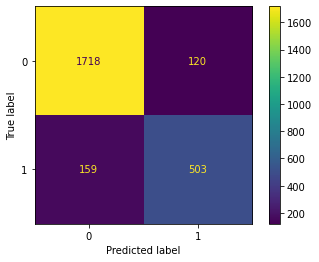

In [335]:
model_reduced = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X_filtered_12, y, test_size=0.25, stratify=y, random_state=0)

model_reduced.fit(X_train, y_train)
preds_reduced = model_reduced.predict(X_test)
print('Accuracy Score Reduced Model: ', accuracy_score(y_test, preds_reduced))
print('ROC_AUC Score Reduced Model: ', roc_auc_score(y_test, preds_reduced))

cm_reduced = confusion_matrix(y_test, preds_reduced, labels=model_reduced.classes_)

disp_reduced = ConfusionMatrixDisplay(confusion_matrix=cm_reduced, display_labels=model_reduced.classes_)

disp_reduced.plot()
plt.show()

In [336]:
model_reduced_grid = LogisticRegression()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_reduced = GridSearchCV(estimator=model_reduced_grid, param_grid=param_grid, cv=5, scoring='accuracy')

grid_reduced.fit(X_filtered_12, y)

print('Best Parameters: ', grid_reduced.best_params_)
print('Best Accuracy: ', grid_reduced.best_score_)

Best Parameters:  {'C': 1}
Best Accuracy:  0.8733000000000001


In [337]:
#X_original.head()

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score Initial Model:  0.8836
ROC_AUC Score Initial Model:  0.8415845083155539


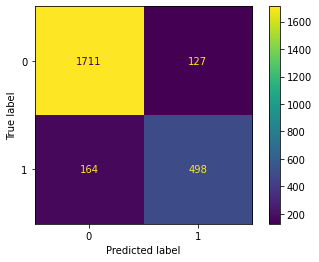

In [338]:
model_initial = LogisticRegression()

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_original, y, test_size=0.25, stratify=y, random_state=0)

model_initial.fit(X_train2, y_train2)
preds_initial = model_initial.predict(X_test2)
print('Accuracy Score Initial Model: ', accuracy_score(y_test2, preds_initial))
print('ROC_AUC Score Initial Model: ', roc_auc_score(y_test2, preds_initial))

cm_initial = confusion_matrix(y_test2, preds_initial, labels=model_initial.classes_)

disp_initial = ConfusionMatrixDisplay(confusion_matrix=cm_initial, display_labels=model_initial.classes_)

disp_initial.plot()
plt.show()

In [339]:
model_initial_grid = LogisticRegression()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_initial = GridSearchCV(estimator=model_initial_grid, param_grid=param_grid, cv=5, scoring='accuracy')

grid_initial.fit(X_original, y)

print('Best Parameters: ', grid_initial.best_params_)
print('Best Accuracy: ', grid_initial.best_score_)

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

Best Parameters:  {'C': 1}
Best Accuracy:  0.8706999999999999


/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [340]:
print(sm_model2.fittedvalues)

0      -1.521100
1       5.549141
2      -1.355639
3      -3.917683
4      -0.001554
          ...   
9995   -5.606154
9996   -8.282578
9997   -6.166830
9998   -5.964783
9999   -3.735153
Length: 10000, dtype: float64


In [341]:
print(sm_model24.fittedvalues)

0      -1.731819
1       5.768358
2      -1.937895
3      -3.832576
4      -0.058667
          ...   
9995   -5.580893
9996   -7.711298
9997   -5.660770
9998   -6.064408
9999   -3.548442
Length: 10000, dtype: float64


In [342]:
print(model_initial.predict(X_test2))

[0 0 0 ... 0 0 0]


In [343]:
print(model_reduced.predict(X_test))

[0 0 0 ... 0 0 0]


In [395]:
print(model_initial.predict_proba(X_test2))

[[9.99858458e-01 1.41542118e-04]
 [9.70696112e-01 2.93038879e-02]
 [9.95185923e-01 4.81407741e-03]
 ...
 [9.98866536e-01 1.13346375e-03]
 [8.16930856e-01 1.83069144e-01]
 [9.99654866e-01 3.45134024e-04]]


In [396]:
print(model_reduced.predict_proba(X_test))

[[9.99746552e-01 2.53448485e-04]
 [9.74551578e-01 2.54484224e-02]
 [9.91583138e-01 8.41686211e-03]
 ...
 [9.99363405e-01 6.36595116e-04]
 [8.35889049e-01 1.64110951e-01]
 [9.99499003e-01 5.00997009e-04]]


In [403]:
probs_reduced = model_reduced.predict_proba(X_test)
probs_churn = probs_reduced[:, -1]
churn_prob_df = pd.DataFrame(np.concatenate([X_test.index.values.reshape(-1,1), probs_churn.reshape(-1,1)], axis=1), columns=['Customer_Index', 'Churn_Probability'])
churn_prob_df

,Customer_Index,Churn_Probability
0,6920.0,0.000253
1,5474.0,0.025448
2,5559.0,0.008417
3,1630.0,0.061246
4,4933.0,0.098114
...,...,...
2495,1844.0,0.001172
2496,1675.0,0.958776
2497,9384.0,0.000637
2498,4178.0,0.164111


In [405]:
churn_prob_df_sorted = churn_prob_df.sort_values(by='Churn_Probability', ascending=False)
churn_prob_df_sorted

,Customer_Index,Churn_Probability
329,505.0,9.991895e-01
116,443.0,9.990783e-01
1000,2726.0,9.990206e-01
2037,3089.0,9.990121e-01
887,279.0,9.989480e-01
...,...,...
1013,5676.0,1.572826e-06
580,8810.0,1.535455e-06
640,5542.0,1.109667e-06
120,5762.0,1.043035e-06


In [404]:
#X_test.index

Int64Index([6920, 5474, 5559, 1630, 4933, 3336, 5969, 3506, 8864, 5292,
            ...
            8569, 4312, 9359, 2675, 6298, 1844, 1675, 9384, 4178, 6053],
           dtype='int64', length=2500)

In [344]:
#df.head()

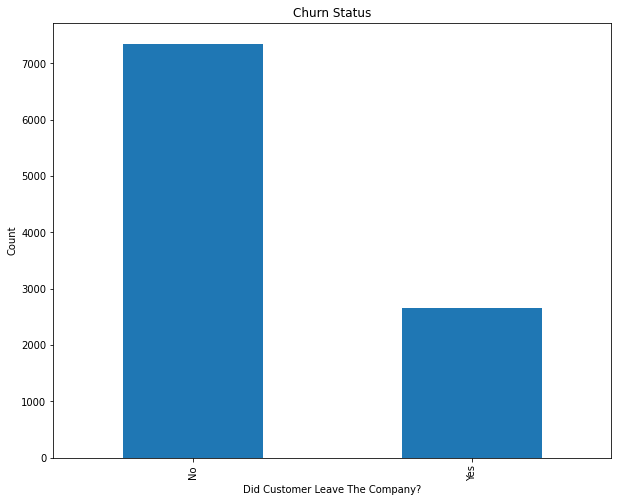

In [345]:
plt.figure(figsize=(10,8))
df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Status')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Count')
plt.show()

In [346]:
#df.columns

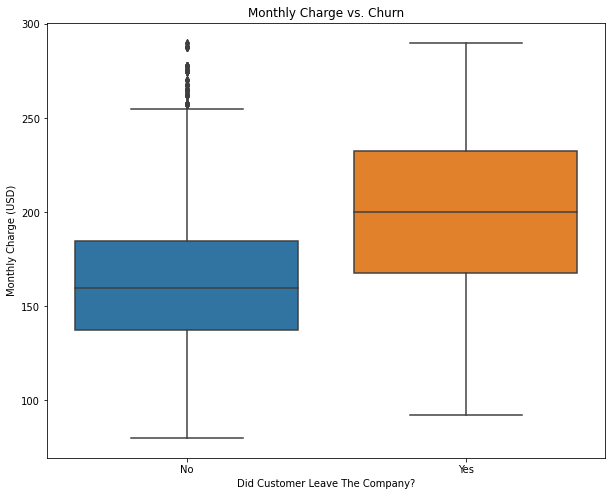

In [347]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Churn', y='MonthlyCharge', data=df)
plt.title('Monthly Charge vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Monthly Charge (USD)')
plt.show()

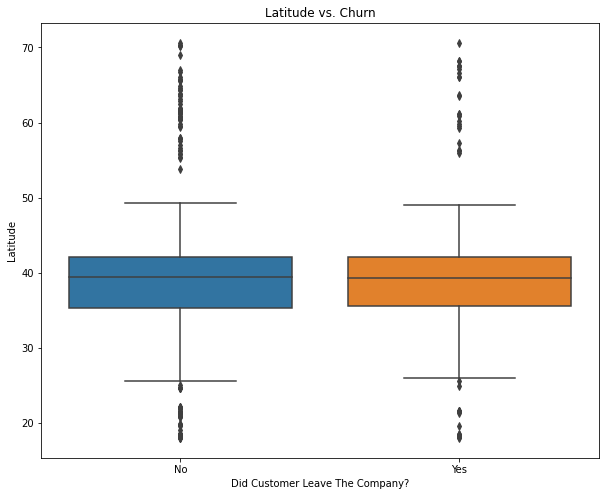

In [348]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Churn', y='Lat', data=df)
plt.title('Latitude vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Latitude')
plt.show()

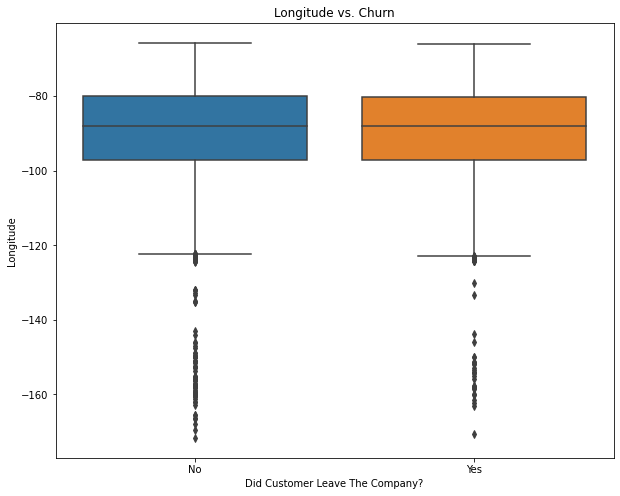

In [349]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Churn', y='Lng', data=df)
plt.title('Longitude vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Longitude')
plt.show()

In [350]:
#df.columns

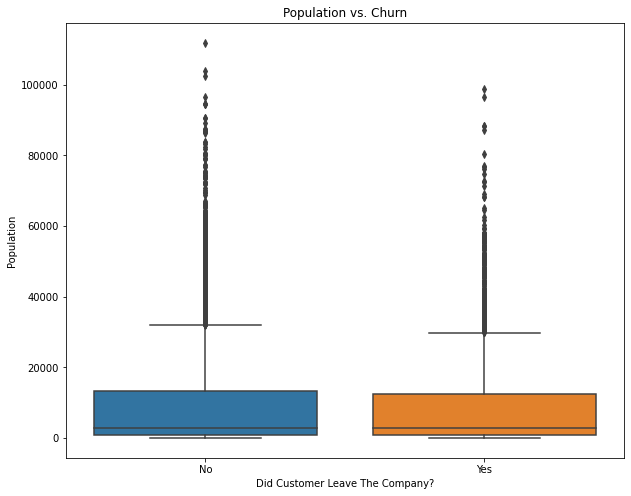

In [351]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Churn', y='Population', data=df)
plt.title('Population vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Population')
plt.show()

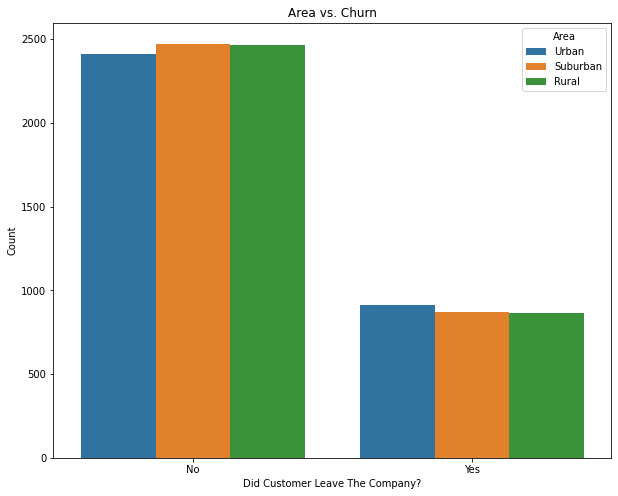

In [352]:
plt.figure(figsize=(10,8))
sns.countplot(x='Churn', hue='Area', data=df)
plt.title('Area vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Count')
plt.show()

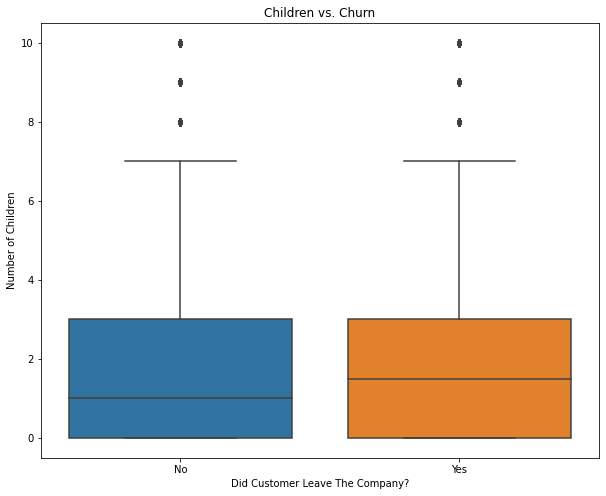

In [353]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Churn', y='Children', data=df)
plt.title('Children vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Number of Children')
plt.show()

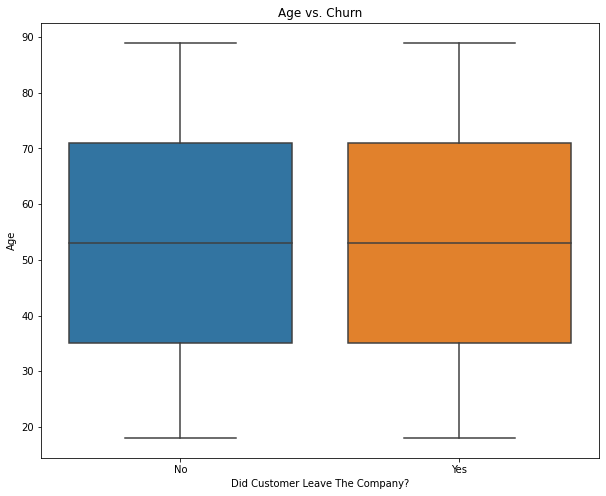

In [354]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Churn', y='Age', data=df)
plt.title('Age vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Age')
plt.show()

In [355]:
#df.columns

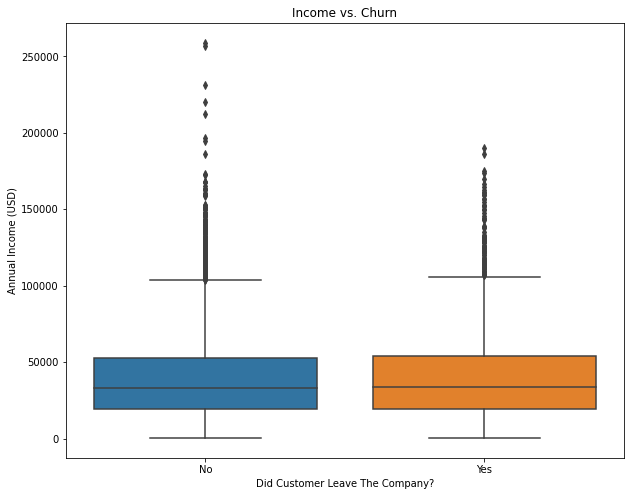

In [356]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Churn', y='Income', data=df)
plt.title('Income vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Annual Income (USD)')
plt.show()

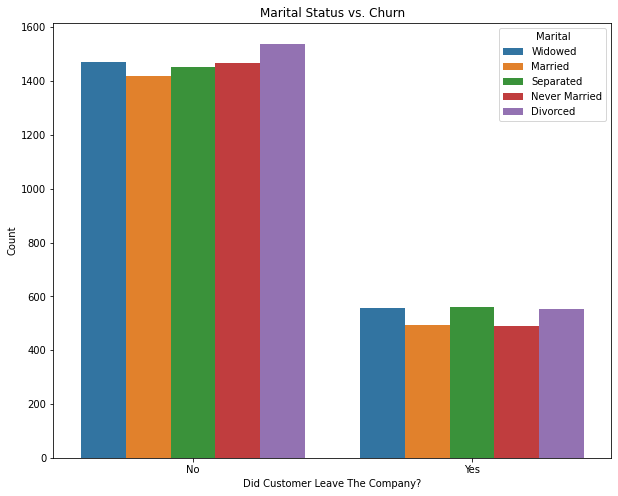

In [357]:
plt.figure(figsize=(10,8))
sns.countplot(x='Churn', hue='Marital', data=df)
plt.title('Marital Status vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Count')
plt.show()

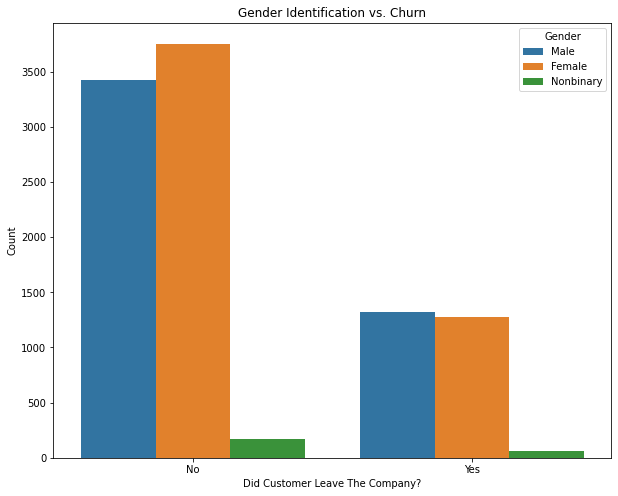

In [358]:
plt.figure(figsize=(10,8))
sns.countplot(x='Churn', hue='Gender', data=df)
plt.title('Gender Identification vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Count')
plt.show()

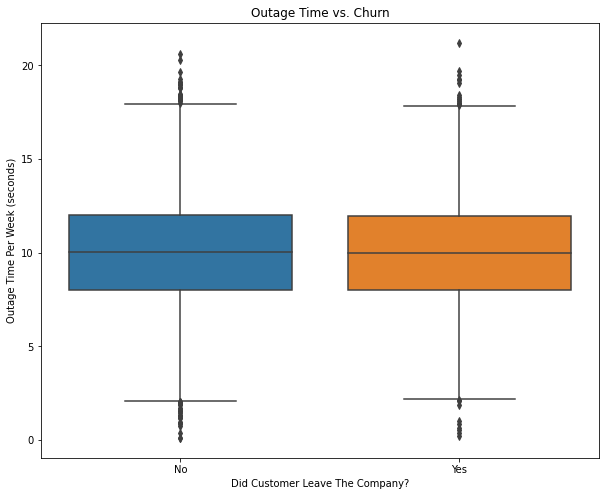

In [359]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Churn', y='Outage_sec_perweek', data=df)
plt.title('Outage Time vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Outage Time Per Week (seconds)')
plt.show()

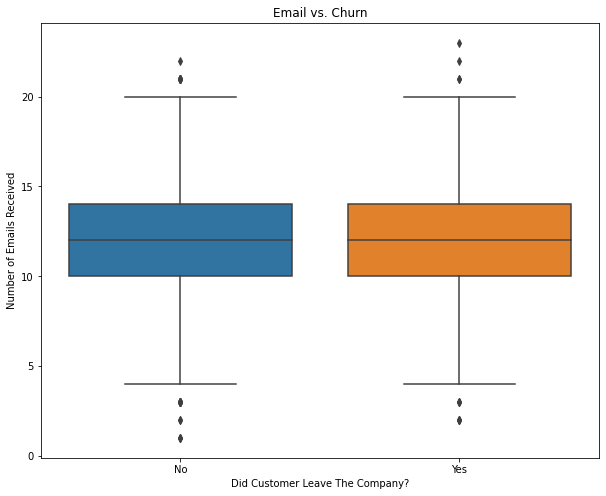

In [360]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Churn', y='Email', data=df)
plt.title('Email vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Number of Emails Received')
plt.show()

In [361]:
#df.columns

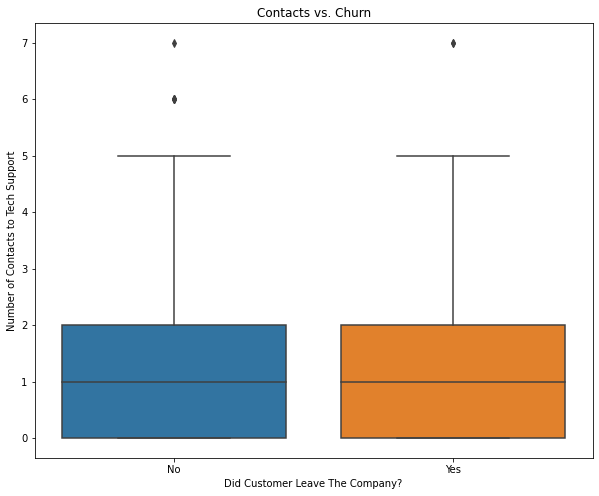

In [362]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Churn', y='Contacts', data=df)
plt.title('Contacts vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Number of Contacts to Tech Support')
plt.show()

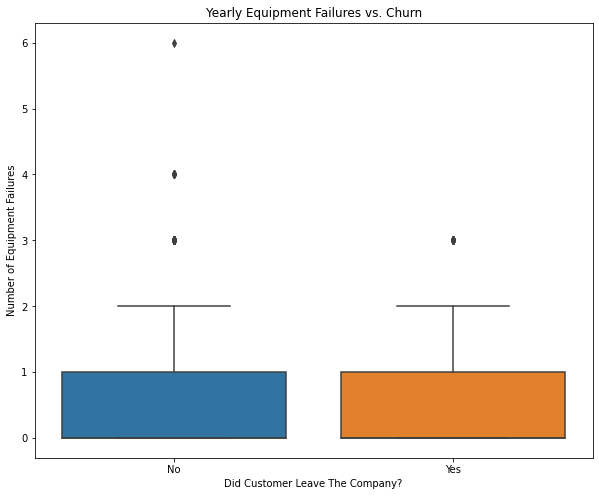

In [363]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Churn', y='Yearly_equip_failure', data=df)
plt.title('Yearly Equipment Failures vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Number of Equipment Failures')
plt.show()

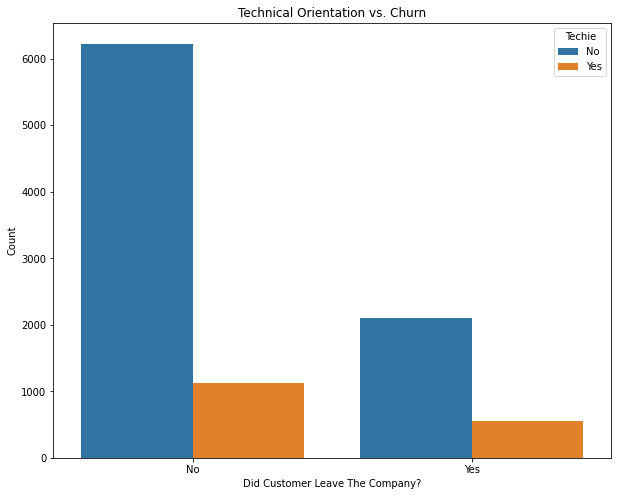

In [364]:
plt.figure(figsize=(10,8))
sns.countplot(x='Churn', hue='Techie', data=df)
plt.title('Technical Orientation vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Count')
plt.show()

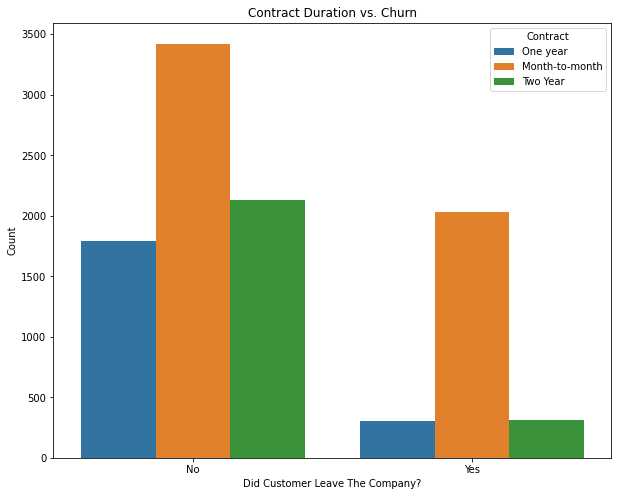

In [365]:
plt.figure(figsize=(10,8))
sns.countplot(x='Churn', hue='Contract', data=df)
plt.title('Contract Duration vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Count')
plt.show()

In [366]:
#df.columns

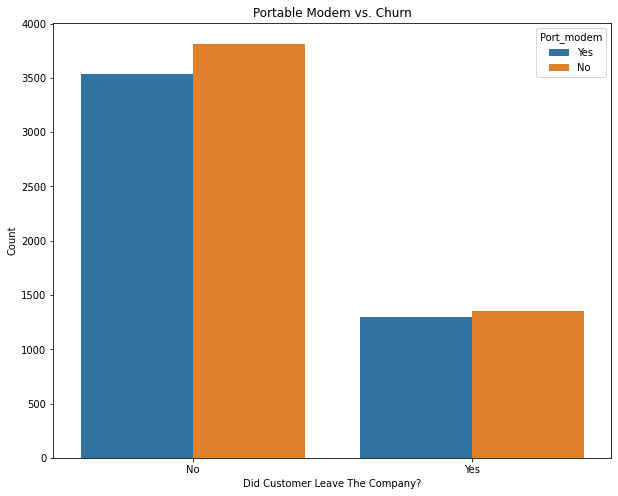

In [367]:
plt.figure(figsize=(10,8))
sns.countplot(x='Churn', hue='Port_modem', data=df)
plt.title('Portable Modem vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Count')
plt.show()

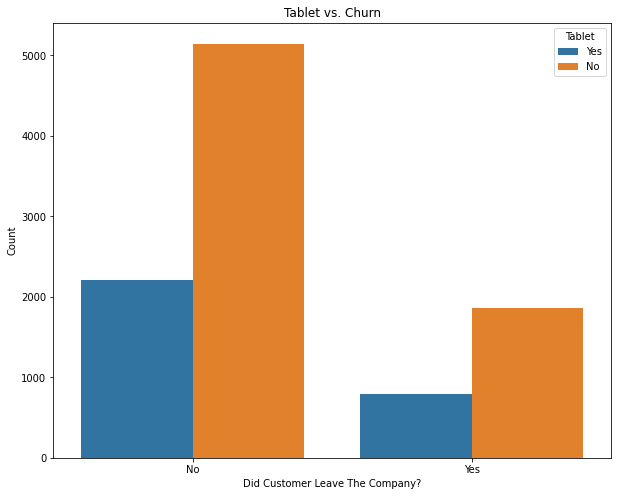

In [368]:
plt.figure(figsize=(10,8))
sns.countplot(x='Churn', hue='Tablet', data=df)
plt.title('Tablet vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Count')
plt.show()

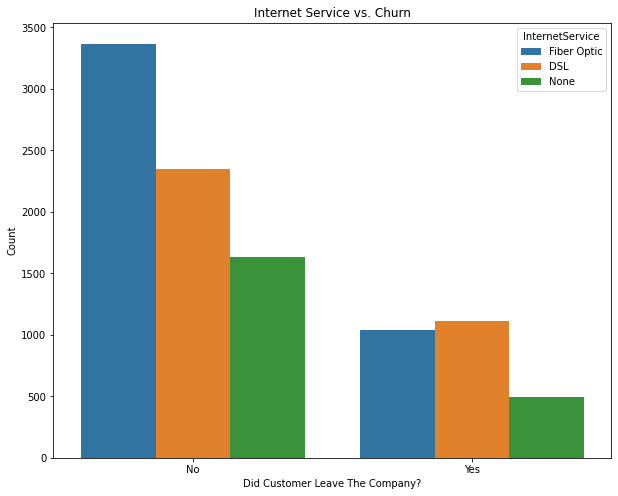

In [369]:
plt.figure(figsize=(10,8))
sns.countplot(x='Churn', hue='InternetService', data=df)
plt.title('Internet Service vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Count')
plt.show()

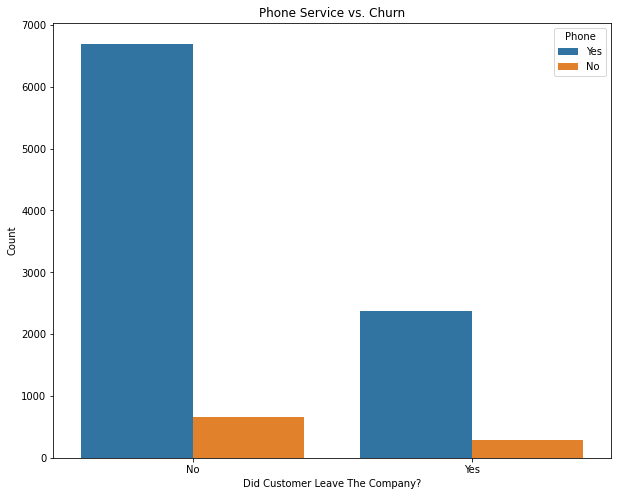

In [370]:
plt.figure(figsize=(10,8))
sns.countplot(x='Churn', hue='Phone', data=df)
plt.title('Phone Service vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Count')
plt.show()

In [371]:
#df.columns

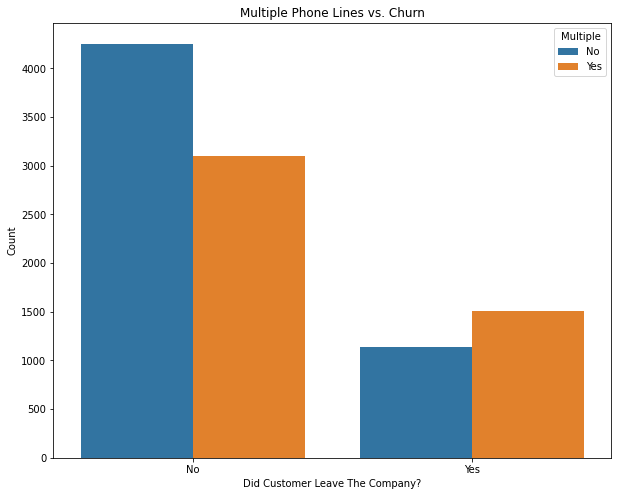

In [372]:
plt.figure(figsize=(10,8))
sns.countplot(x='Churn', hue='Multiple', data=df)
plt.title('Multiple Phone Lines vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Count')
plt.show()

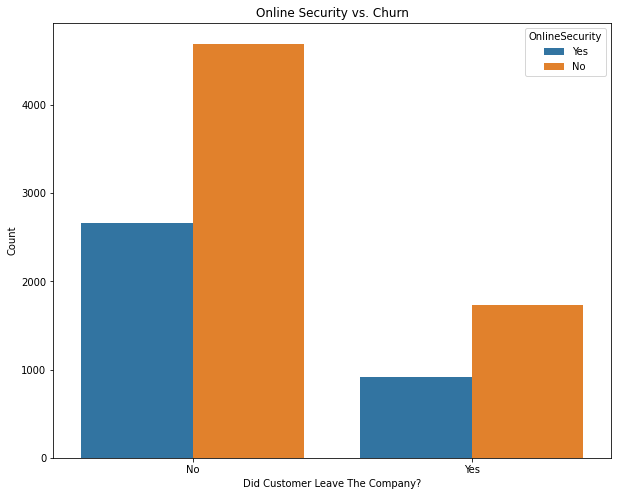

In [373]:
plt.figure(figsize=(10,8))
sns.countplot(x='Churn', hue='OnlineSecurity', data=df)
plt.title('Online Security vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Count')
plt.show()

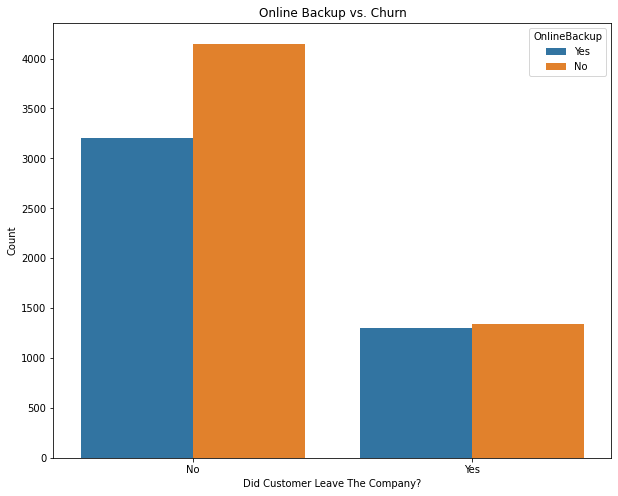

In [374]:
plt.figure(figsize=(10,8))
sns.countplot(x='Churn', hue='OnlineBackup', data=df)
plt.title('Online Backup vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Count')
plt.show()

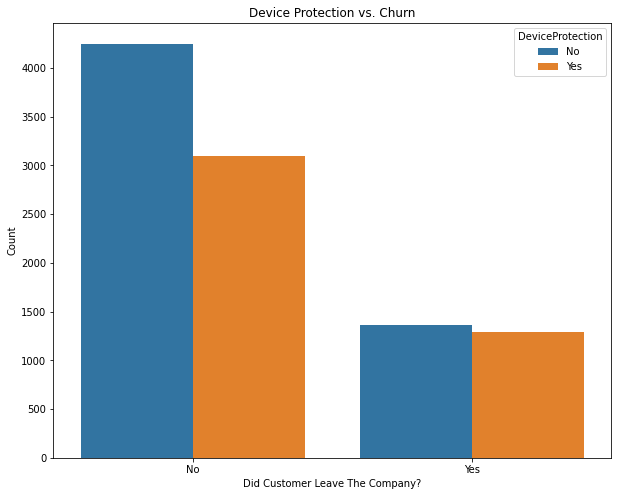

In [375]:
plt.figure(figsize=(10,8))
sns.countplot(x='Churn', hue='DeviceProtection', data=df)
plt.title('Device Protection vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Count')
plt.show()

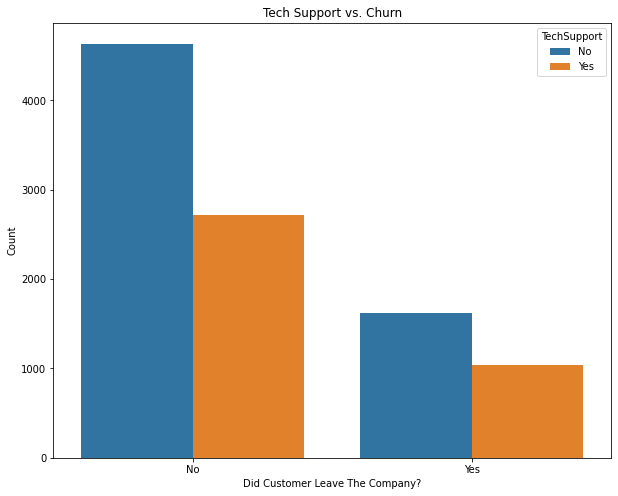

In [376]:
plt.figure(figsize=(10,8))
sns.countplot(x='Churn', hue='TechSupport', data=df)
plt.title('Tech Support vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Count')
plt.show()

In [377]:
#df.columns

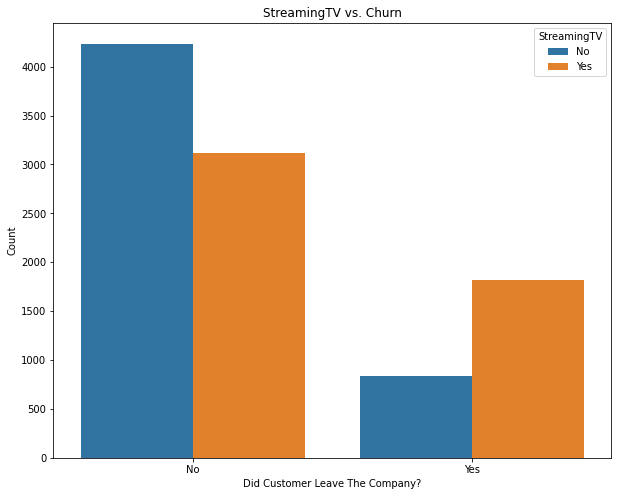

In [378]:
plt.figure(figsize=(10,8))
sns.countplot(x='Churn', hue='StreamingTV', data=df)
plt.title('StreamingTV vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Count')
plt.show()

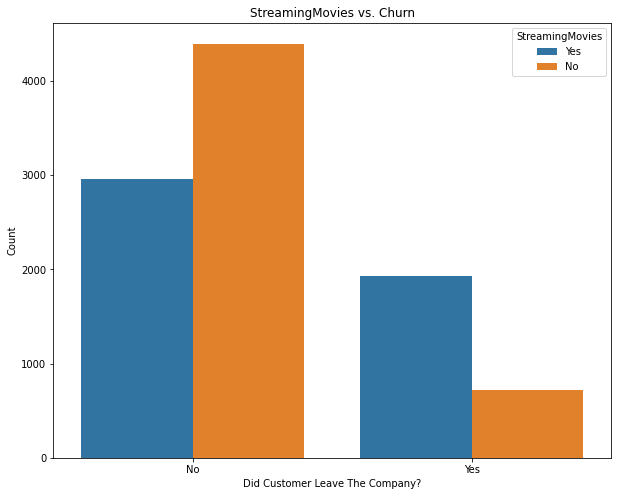

In [379]:
plt.figure(figsize=(10,8))
sns.countplot(x='Churn', hue='StreamingMovies', data=df)
plt.title('StreamingMovies vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Count')
plt.show()

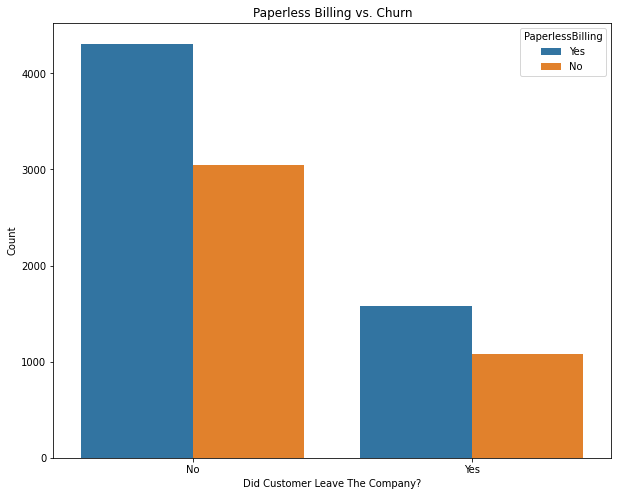

In [380]:
plt.figure(figsize=(10,8))
sns.countplot(x='Churn', hue='PaperlessBilling', data=df)
plt.title('Paperless Billing vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Count')
plt.show()

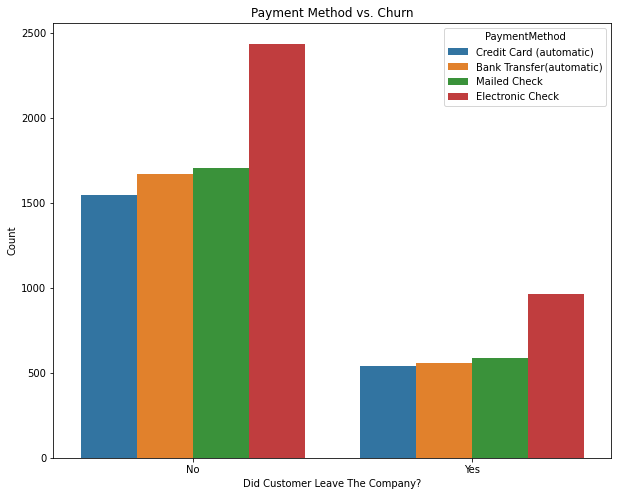

In [381]:
plt.figure(figsize=(10,8))
sns.countplot(x='Churn', hue='PaymentMethod', data=df)
plt.title('Payment Method vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Count')
plt.show()

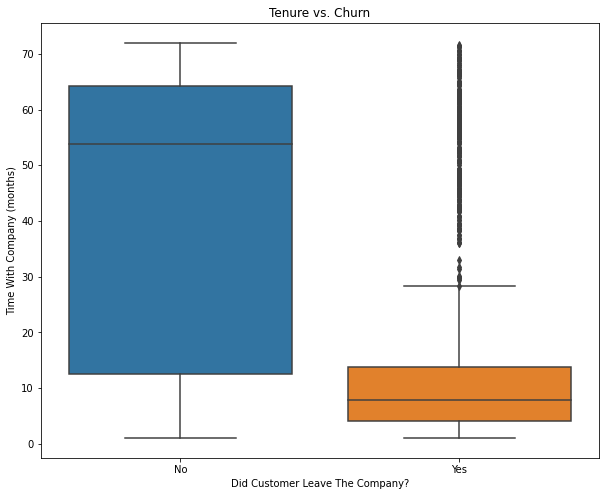

In [382]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Tenure vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Time With Company (months)')
plt.show()

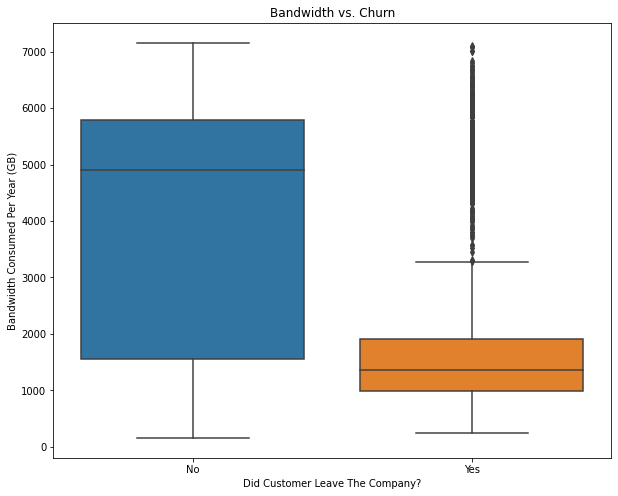

In [383]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Churn', y='Bandwidth_GB_Year', data=df)
plt.title('Bandwidth vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Bandwidth Consumed Per Year (GB)')
plt.show()

In [384]:
#df.columns

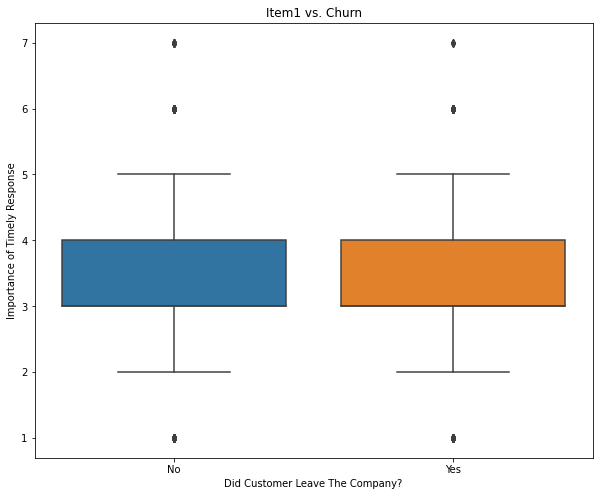

In [385]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Churn', y='Item1', data=df)
plt.title('Item1 vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Importance of Timely Response')
plt.show()

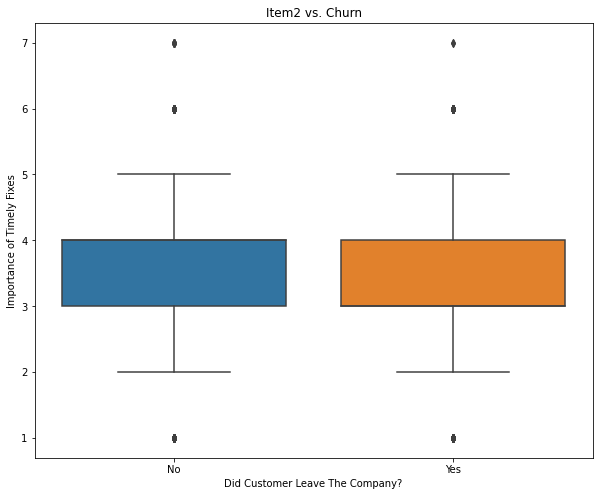

In [386]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Churn', y='Item2', data=df)
plt.title('Item2 vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Importance of Timely Fixes')
plt.show()

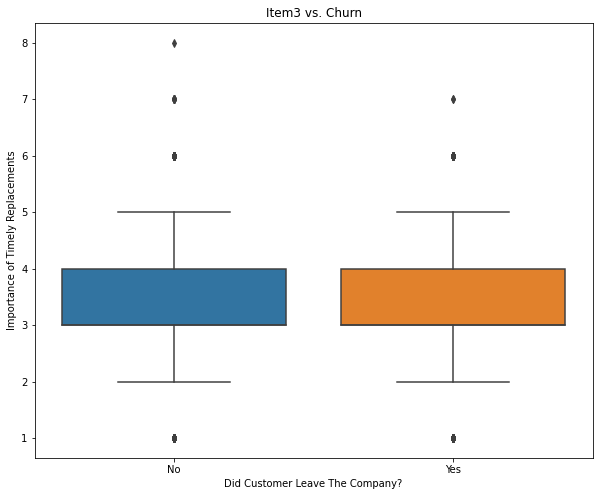

In [387]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Churn', y='Item3', data=df)
plt.title('Item3 vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Importance of Timely Replacements')
plt.show()

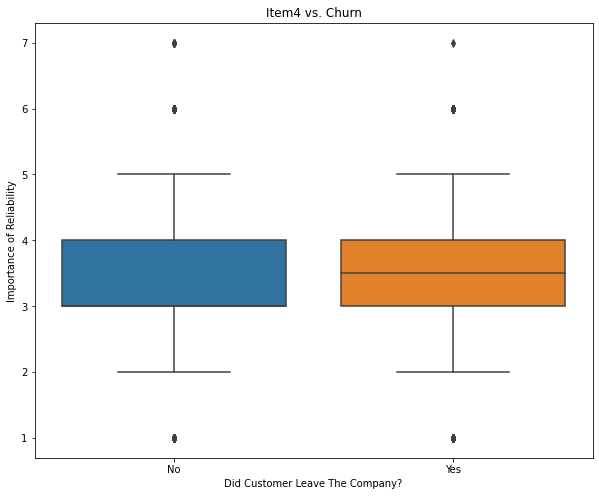

In [388]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Churn', y='Item4', data=df)
plt.title('Item4 vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Importance of Reliability')
plt.show()

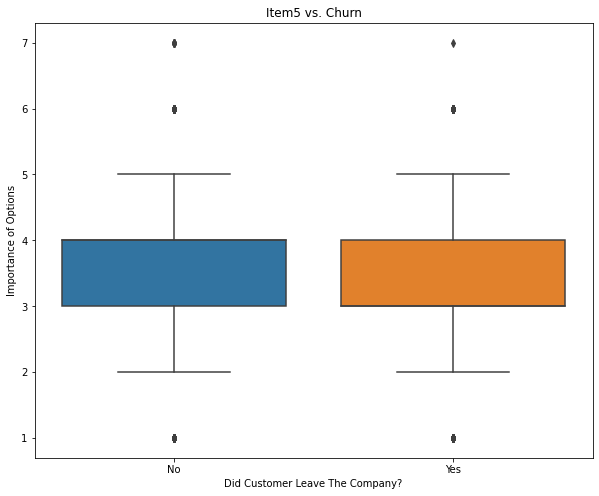

In [389]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Churn', y='Item5', data=df)
plt.title('Item5 vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Importance of Options')
plt.show()

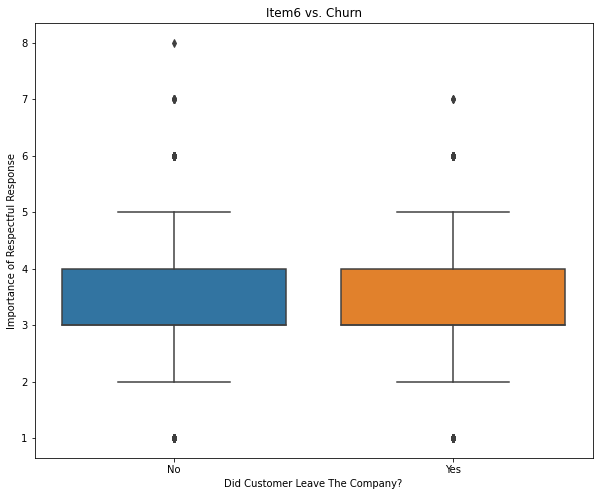

In [390]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Churn', y='Item6', data=df)
plt.title('Item6 vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Importance of Respectful Response')
plt.show()

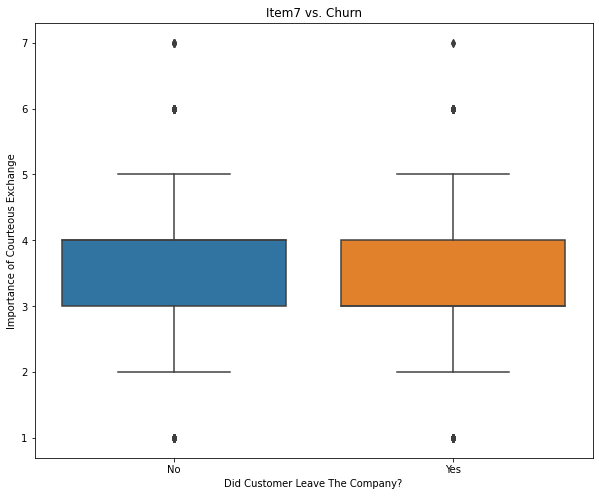

In [391]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Churn', y='Item7', data=df)
plt.title('Item7 vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Importance of Courteous Exchange')
plt.show()

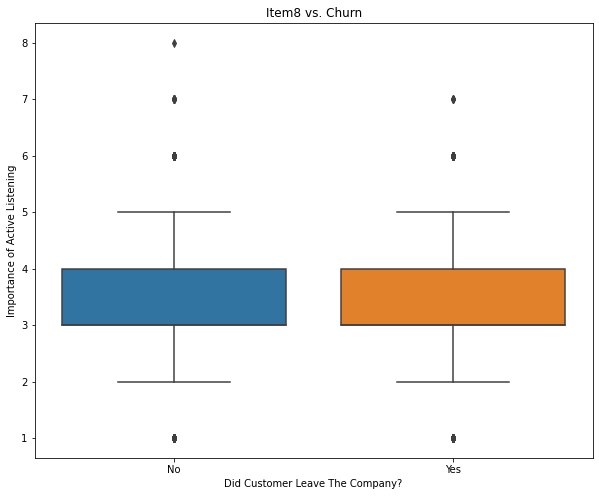

In [392]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Churn', y='Item8', data=df)
plt.title('Item8 vs. Churn')
plt.xlabel('Did Customer Leave The Company?')
plt.ylabel('Importance of Active Listening')
plt.show()

In [393]:
#df_log.to_csv('churn_with_logs.csv')

In [394]:
#df_original.to_csv('churn_with_originals.csv')